# Práctica No.1-Statiscal Learning 1
## Modelo Predictivo de Precios de Casas con Regresión Líneal
### Luis Edmundo Alvarez Soto Carné 21001844

In [1]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
import tensorflow as tf
from scipy import stats
from scipy.stats import pearsonr
import datetime, os

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
def f_spgraph(p_x, p_y,p_title,p_xlabel, p_ylabel):
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = p_x, y = p_y, color = 'mediumseagreen')
    plt.title(p_title, fontdict = {'fontsize':15})
    maxDist = max(max(p_y), max(p_x)) 
    minDist = min(min(p_y), min(p_x)) 
    plt.xlabel(p_xlabel, fontdict= {'fontsize':13})
    plt.ylabel(p_ylabel, fontdict= {'fontsize':13})
    plt.tight_layout();

In [4]:
#importar archivo
datos = np.load("proyecto_training_data.npy")

In [5]:
# Transformación del data set en un data frame
df = pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
  
# print DataFrame
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


## Análisis Exploratorio de datos en el DataFrame

In [6]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Gráficas de cada Variable

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

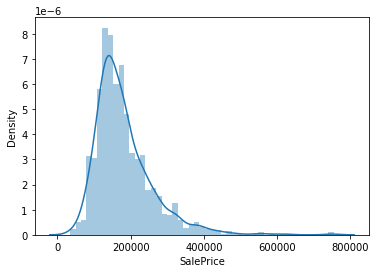

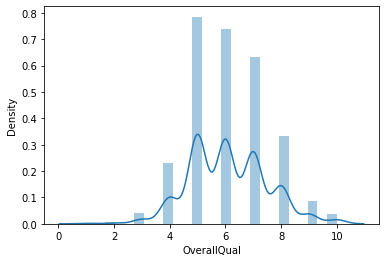

In [7]:
# desactiva mensajes futureWarnings
import warnings
warnings.filterwarnings("ignore")
# create distplots
##for column in df.columns:
plt.figure()
sns.distplot(df['SalePrice'])
plt.figure()
sns.distplot(df['OverallQual'])

## Coeficiente de correlación entre el Precio y demás variables

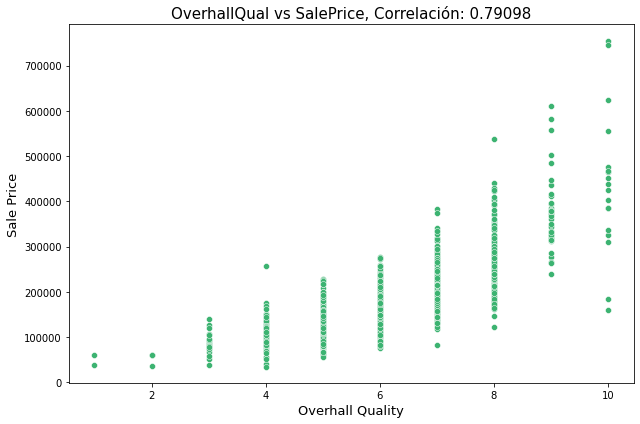

In [8]:
v_corr_oq = round(df['SalePrice'].corr(df['OverallQual'], method='pearson'),5)
f_spgraph(df['OverallQual'],df['SalePrice'], 'OverhallQual vs SalePrice, Correlación: '+ str(v_corr_oq), 'Overhall Quality','Sale Price')

# *Nota:* la variable con más correlación respecto al Sale Price es: *Overhall Quality (0.79098)*

## Separación del Set de Datos para Entrenamiento y de Pruebas 

In [9]:
#verificación de tamaño de archivo
numrows, numcols = datos.shape;
trainrows = int(numrows * 0.8);
testrows1 = int(numrows * 0.2);
print("shape of data:",df.shape)
print("TrainRows: ",numrows,trainrows)
print("TestRows: ",numrows,testrows1)
print("Cols: ",numcols)

shape of data: (1460, 6)
TrainRows:  1460 1168
TestRows:  1460 292
Cols:  6


In [10]:
print(df[:trainrows])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


In [11]:
print(df[testrows1:])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
292    131000.0          5.0    1148.0           8.0     1949.0         60.0
293    235000.0          7.0    1468.0           9.0     1977.0          NaN
294    167000.0          6.0    1644.0           7.0     1953.0         80.0
295    142500.0          6.0    1003.0           6.0     1984.0         37.0
296    152000.0          5.0     910.0           6.0     1950.0         75.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1168 rows x 6 columns]


In [12]:
datatrain = df[:trainrows]
datatest = df[trainrows:]
print("shape of datatrain:",datatrain.shape)
print("shape of datatest:",datatest.shape)


shape of datatrain: (1168, 6)
shape of datatest: (292, 6)


# Hipótesis
    Utilizando el método Mini Batch, el cual busca con una muestra del dataset de entrenamiento calcular el valor de error del modelo y los valores de los coheficientes, comprobar que con un learning rate mayor combinado con un epoch menor a 10 y el batch size menor que 12 encuentra una minimización del error rápida al modelo entrenado.

### Definición de la clase para el Modelo aplicando TensorFlow

In [13]:
class modeloLineal:
    def __init__(self):
        # Inicializa el vector de weights
        self.w = tf.get_variable("weights", dtype = tf.float32, shape = [1,2], initializer = tf.zeros_initializer())
        
    # Funcion para generar prediccion de modelo
    def __call__(self, x):
        with tf.name_scope("modelo"):
            # Mutiplica la matriz de entramiento con el vector de los pesos (weights)
            return tf.matmul(self.w,x)
        
    # Actualiza parámetros usando gradient descent
    def actualiza(self, x, y, lg):
        with tf.name_scope("error"):
            error = self.error(x,y)
            # Escribe al grafo el MSE
            error_r = tf.summary.scalar("ErrorR", error)
            
        gradient = tf.gradients(error, [self.w])
        # Actualiza parámetros
        upd_w = tf.assign(self.w, self.w - lg * gradient[0])
        return upd_w, error, error_r
    
    # Calcula MSE
    def error(self, x, y):
        error = 1/2 * tf.reduce_mean(tf.math.square(y - self(x)))
#        error = 1/2 * (tf.reduce_mean(tf.square(y - self(x))))
        return error

## Función de entrenamiento con tensorFlow

In [14]:
# Entrenamiento
def f_entrena(lr, epochs, visual, bs):
    # Path y nombre archivos para verlo con Tensorboard
    archivo = './graphs/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_lr="+str(lr)+ "_ep="+str(epochs) + "_bS="+str(bs)
    
    totite = int(len(datatrain["SalePrice"])/bs)
    
    print(len(datatrain["SalePrice"]), totite)
      
    #tf.reset_default_graph()
    gr = tf.Graph()
    with gr.as_default(): #objeto para el contenido del grafo
        
        # Placeholders para el grafo
        t_x = tf.placeholder(tf.float32, [2,len(datatrain["OverallQual"])], "t_x")
        t_y = tf.placeholder(tf.float32, [len(datatrain["SalePrice"])], "t_y")
        
        # Inicialización de objeto de clase
        modelo = modeloLineal()

        # Utilizacion de método update para hacer el entrenamiento
        parametros = modelo.actualiza(t_x, t_y, lr)
        
        # Crea archivo
        writer = tf.summary.FileWriter(archivo, gr)
        
        # Inicializa variables
        with tf.train.MonitoredSession() as session:
            for epoch in range(epochs): #5 epochs
                 
                for i in range(totite):
                    muestra_inicio = i*bs
                    muestra_fin = muestra_inicio + bs
                    
                    x_mb =  np.array(x[muestra_inicio:muestra_fin]).reshape([-1,1])
                    y_mb = np.array(y[muestra_inicio:muestra_fin]).reshape([-1,1])

                    # Diccionario de modelo resultante
                    d_param = {t_x:x, t_y:y}

                    # Entrenamiento
                    training = session.run(parametros, feed_dict = d_param)

                    # # evalúa si imprime o no la iteración, el peso y valor del costo del entrenamiento
                    if (i)%visual == 0:
                        # actualiza las predicciones del modelo
                        weights = session.run(modelo.w, feed_dict = d_param)
                        # Escribe en archivo el entrenamiento
                        writer.add_summary(training[2], i)
                        print("Conteo epoch: ", epoch, "Iteracion: ",i, "Weights: ", weights, "Costo: ", training[1])

                writer.close()

In [15]:
x = datatrain["OverallQual"]
x = np.array([x, np.ones_like(x)], dtype = "float64")
y = datatrain["SalePrice"]

In [16]:
#Entrenamiento 1
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.001, 10,10,4)

1168 292
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[1187.9478   180.59026]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[10741.556   1623.3298]] Costo:  9345164000.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[17090.812  2565.745]] Costo:  4903192000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[21311.322  3175.788]] Costo:  2942662700.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[24117.639   3565.0334]] Costo:  2077281500.0
Conteo epoch:  0 Iteracion:  50 Weights:  [[25984.463   3807.6033]] Costo:  1695228000.0
Conteo epoch:  0 Iteracion:  60 Weights:  [[27227.148  3952.74 ]] Costo:  1526484100.0
Conteo epoch:  0 Iteracion:  70 Weights:  [[28055.201   4033.1565]] Costo:  1451881300.0
Conteo epoch:  0 Iteracion:  80 Weights:  [[28607.799  4070.585]] Costo:  1418826500.0
Conteo epoch:  0 Iteracion:  90 Weights:  [[28977.408   4079.4622]] Costo:  14

Conteo epoch:  3 Iteracion:  90 Weights:  [[30332.76    101.671]] Costo:  1373101600.0
Conteo epoch:  3 Iteracion:  100 Weights:  [[30339.895      55.95682]] Costo:  1372887400.0
Conteo epoch:  3 Iteracion:  110 Weights:  [[3.0347023e+04 1.0264671e+01]] Costo:  1372673500.0
Conteo epoch:  3 Iteracion:  120 Weights:  [[30354.152     -35.40562]] Costo:  1372459900.0
Conteo epoch:  3 Iteracion:  130 Weights:  [[30361.281      -81.054245]] Costo:  1372246400.0
Conteo epoch:  3 Iteracion:  140 Weights:  [[30368.41      -126.681366]] Costo:  1372033200.0
Conteo epoch:  3 Iteracion:  150 Weights:  [[30375.54     -172.28726]] Costo:  1371819500.0
Conteo epoch:  3 Iteracion:  160 Weights:  [[30382.65     -217.87169]] Costo:  1371607200.0
Conteo epoch:  3 Iteracion:  170 Weights:  [[30389.76     -263.43417]] Costo:  1371394600.0
Conteo epoch:  3 Iteracion:  180 Weights:  [[30396.87     -308.97488]] Costo:  1371182000.0
Conteo epoch:  3 Iteracion:  190 Weights:  [[30403.979    -354.49402]] Costo:

Conteo epoch:  6 Iteracion:  270 Weights:  [[31068.166  -4608.1143]] Costo:  1351577500.0
Conteo epoch:  6 Iteracion:  280 Weights:  [[31074.963  -4651.5986]] Costo:  1351383700.0
Conteo epoch:  6 Iteracion:  290 Weights:  [[31081.748  -4695.0625]] Costo:  1351190000.0
Conteo epoch:  7 Iteracion:  0 Weights:  [[31083.104 -4703.753]] Costo:  1351151200.0
Conteo epoch:  7 Iteracion:  10 Weights:  [[31089.88  -4747.192]] Costo:  1350958000.0
Conteo epoch:  7 Iteracion:  20 Weights:  [[31096.658  -4790.6104]] Costo:  1350764900.0
Conteo epoch:  7 Iteracion:  30 Weights:  [[31103.436 -4834.008]] Costo:  1350571900.0
Conteo epoch:  7 Iteracion:  40 Weights:  [[31110.213 -4877.385]] Costo:  1350379500.0
Conteo epoch:  7 Iteracion:  50 Weights:  [[31116.99   -4920.7417]] Costo:  1350186600.0
Conteo epoch:  7 Iteracion:  60 Weights:  [[31123.754 -4964.078]] Costo:  1349994200.0
Conteo epoch:  7 Iteracion:  70 Weights:  [[31130.512 -5007.394]] Costo:  1349802100.0
Conteo epoch:  7 Iteracion:  80

In [17]:
#Entrenamiento 2
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,5,5,6)

1168 194
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[28298.838   4124.9062]] Costo:  1501217400.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[29737.262   3861.6106]] Costo:  1391275100.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[29819.43    3388.8462]] Costo:  1388968000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[29893.148   2917.0566]] Costo:  1386686300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[29966.47    2447.4883]] Cos

Conteo epoch:  2 Iteracion:  90 Weights:  [[ 32830.13  -15892.101]] Costo:  1304520000.0
Conteo epoch:  2 Iteracion:  95 Weights:  [[ 32859.887 -16082.678]] Costo:  1303775500.0
Conteo epoch:  2 Iteracion:  100 Weights:  [[ 32889.574 -16272.804]] Costo:  1303034100.0
Conteo epoch:  2 Iteracion:  105 Weights:  [[ 32919.19  -16462.479]] Costo:  1302296600.0
Conteo epoch:  2 Iteracion:  110 Weights:  [[ 32948.734 -16651.705]] Costo:  1301562500.0
Conteo epoch:  2 Iteracion:  115 Weights:  [[ 32978.215 -16840.484]] Costo:  1300831700.0
Conteo epoch:  2 Iteracion:  120 Weights:  [[ 33007.62  -17028.816]] Costo:  1300104600.0
Conteo epoch:  2 Iteracion:  125 Weights:  [[ 33036.96  -17216.705]] Costo:  1299380900.0
Conteo epoch:  2 Iteracion:  130 Weights:  [[ 33066.227 -17404.146]] Costo:  1298660400.0
Conteo epoch:  2 Iteracion:  135 Weights:  [[ 33095.426 -17591.148]] Costo:  1297943400.0
Conteo epoch:  2 Iteracion:  140 Weights:  [[ 33124.56  -17777.703]] Costo:  1297230000.0
Conteo epoch

In [18]:
#Entrenamiento 3
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.0001,10,5,32)

1168 36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[118.79477   18.059025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[705.6705  107.24584]] Costo:  18700685000.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[1280.8885   194.61244]] Costo:  18019555000.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[1844.6808  280.195 ]] Costo:  17365232000.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[2397.2747   364.02902]] Costo:  16736657000.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[2938.8923  446.1492]] Costo:  16132826000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[3469.752   526.5896]] Costo:  15552758000.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[3990.0676  605.3836]] Costo:  14995518000.0
Conteo epoch:  1 Iteracion:  0 Weights:  [[4092.884    620.94775]] Costo:  14886731000.0
Conteo epoch:  1 Iteracion:  5 Weights:  [[4600.8228  697.8093]] Costo:  14

In [19]:
#Entrenamiento 4
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.0001,100,5,32)

1168 36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[118.79477   18.059025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[705.6705  107.24584]] Costo:  18700685000.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[1280.8885   194.61244]] Costo:  18019555000.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[1844.6808  280.195 ]] Costo:  17365232000.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[2397.2747   364.02902]] Costo:  16736657000.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[2938.8923  446.1492]] Costo:  16132826000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[3469.752   526.5896]] Costo:  15552758000.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[3990.0676  605.3836]] Costo:  14995518000.0
Conteo epoch:  1 Iteracion:  0 Weights:  [[4092.884    620.94775]] Costo:  14886731000.0
Conteo epoch:  1 Iteracion:  5 Weights:  [[4600.8228  697.8093]] Costo:  14

Conteo epoch:  14 Iteracion:  20 Weights:  [[26066.588   3813.0935]] Costo:  1661523200.0
Conteo epoch:  14 Iteracion:  25 Weights:  [[26138.492   3821.8757]] Costo:  1650964400.0
Conteo epoch:  14 Iteracion:  30 Weights:  [[26208.975   3830.4363]] Costo:  1640821500.0
Conteo epoch:  14 Iteracion:  35 Weights:  [[26278.064  3838.779]] Costo:  1631076100.0
Conteo epoch:  15 Iteracion:  0 Weights:  [[26291.717   3840.4219]] Costo:  1629173600.0
Conteo epoch:  15 Iteracion:  5 Weights:  [[26359.172   3848.5093]] Costo:  1619886500.0
Conteo epoch:  15 Iteracion:  10 Weights:  [[26425.295   3856.3884]] Costo:  1610964600.0
Conteo epoch:  15 Iteracion:  15 Weights:  [[26490.107   3864.0637]] Costo:  1602393500.0
Conteo epoch:  15 Iteracion:  20 Weights:  [[26553.643  3871.539]] Costo:  1594158600.0
Conteo epoch:  15 Iteracion:  25 Weights:  [[26615.92    3878.8184]] Costo:  1586248000.0
Conteo epoch:  15 Iteracion:  30 Weights:  [[26676.965   3885.9058]] Costo:  1578648600.0
Conteo epoch:  1

Conteo epoch:  30 Iteracion:  25 Weights:  [[29359.6    4043.505]] Costo:  1394710500.0
Conteo epoch:  30 Iteracion:  30 Weights:  [[29366.912   4042.2075]] Costo:  1394599600.0
Conteo epoch:  30 Iteracion:  35 Weights:  [[29374.086  4040.889]] Costo:  1394492300.0
Conteo epoch:  31 Iteracion:  0 Weights:  [[29375.504   4040.6226]] Costo:  1394471700.0
Conteo epoch:  31 Iteracion:  5 Weights:  [[29382.516   4039.2786]] Costo:  1394369000.0
Conteo epoch:  31 Iteracion:  10 Weights:  [[29389.395   4037.9143]] Costo:  1394270100.0
Conteo epoch:  31 Iteracion:  15 Weights:  [[29396.145   4036.5295]] Costo:  1394174500.0
Conteo epoch:  31 Iteracion:  20 Weights:  [[29402.768   4035.1252]] Costo:  1394082300.0
Conteo epoch:  31 Iteracion:  25 Weights:  [[29409.268   4033.7017]] Costo:  1393993300.0
Conteo epoch:  31 Iteracion:  30 Weights:  [[29415.646   4032.2588]] Costo:  1393907500.0
Conteo epoch:  31 Iteracion:  35 Weights:  [[29421.904   4030.7976]] Costo:  1393824500.0
Conteo epoch:  3

Conteo epoch:  47 Iteracion:  15 Weights:  [[29722.303   3806.9202]] Costo:  1390813800.0
Conteo epoch:  47 Iteracion:  20 Weights:  [[29723.293   3804.6428]] Costo:  1390801500.0
Conteo epoch:  47 Iteracion:  25 Weights:  [[29724.271   3802.3635]] Costo:  1390789200.0
Conteo epoch:  47 Iteracion:  30 Weights:  [[29725.236   3800.0825]] Costo:  1390777100.0
Conteo epoch:  47 Iteracion:  35 Weights:  [[29726.19    3797.7996]] Costo:  1390764700.0
Conteo epoch:  48 Iteracion:  0 Weights:  [[29726.379   3797.3428]] Costo:  1390762200.0
Conteo epoch:  48 Iteracion:  5 Weights:  [[29727.318   3795.0579]] Costo:  1390750200.0
Conteo epoch:  48 Iteracion:  10 Weights:  [[29728.248  3792.771]] Costo:  1390737900.0
Conteo epoch:  48 Iteracion:  15 Weights:  [[29729.164   3790.4827]] Costo:  1390725500.0
Conteo epoch:  48 Iteracion:  20 Weights:  [[29730.07    3788.1929]] Costo:  1390713700.0
Conteo epoch:  48 Iteracion:  25 Weights:  [[29730.965   3785.9011]] Costo:  1390701300.0
Conteo epoch: 

Conteo epoch:  64 Iteracion:  30 Weights:  [[29797.338   3514.1277]] Costo:  1389350400.0
Conteo epoch:  64 Iteracion:  35 Weights:  [[29797.758  3511.768]] Costo:  1389339000.0
Conteo epoch:  65 Iteracion:  0 Weights:  [[29797.842   3511.2961]] Costo:  1389336700.0
Conteo epoch:  65 Iteracion:  5 Weights:  [[29798.262   3508.9365]] Costo:  1389324800.0
Conteo epoch:  65 Iteracion:  10 Weights:  [[29798.682  3506.577]] Costo:  1389313500.0
Conteo epoch:  65 Iteracion:  15 Weights:  [[29799.102   3504.2173]] Costo:  1389302100.0
Conteo epoch:  65 Iteracion:  20 Weights:  [[29799.52    3501.8577]] Costo:  1389290400.0
Conteo epoch:  65 Iteracion:  25 Weights:  [[29799.93   3499.498]] Costo:  1389279000.0
Conteo epoch:  65 Iteracion:  30 Weights:  [[29800.34    3497.1384]] Costo:  1389267800.0
Conteo epoch:  65 Iteracion:  35 Weights:  [[29800.75    3494.7788]] Costo:  1389256200.0
Conteo epoch:  66 Iteracion:  0 Weights:  [[29800.832  3494.307]] Costo:  1389253800.0
Conteo epoch:  66 Ite

Conteo epoch:  82 Iteracion:  5 Weights:  [[29845.557   3220.0115]] Costo:  1387924600.0
Conteo epoch:  82 Iteracion:  10 Weights:  [[29845.928   3217.6519]] Costo:  1387912800.0
Conteo epoch:  82 Iteracion:  15 Weights:  [[29846.299   3215.2922]] Costo:  1387901400.0
Conteo epoch:  82 Iteracion:  20 Weights:  [[29846.67    3212.9326]] Costo:  1387890200.0
Conteo epoch:  82 Iteracion:  25 Weights:  [[29847.041   3210.5742]] Costo:  1387878800.0
Conteo epoch:  82 Iteracion:  30 Weights:  [[29847.412   3208.2158]] Costo:  1387867500.0
Conteo epoch:  82 Iteracion:  35 Weights:  [[29847.783   3205.8574]] Costo:  1387855600.0
Conteo epoch:  83 Iteracion:  0 Weights:  [[29847.857   3205.3857]] Costo:  1387853600.0
Conteo epoch:  83 Iteracion:  5 Weights:  [[29848.229   3203.0273]] Costo:  1387842200.0
Conteo epoch:  83 Iteracion:  10 Weights:  [[29848.6    3200.669]] Costo:  1387830800.0
Conteo epoch:  83 Iteracion:  15 Weights:  [[29848.97    3198.3105]] Costo:  1387819300.0
Conteo epoch:  

Conteo epoch:  99 Iteracion:  15 Weights:  [[29891.674  2926.896]] Costo:  1386508500.0
Conteo epoch:  99 Iteracion:  20 Weights:  [[29892.041   2924.5425]] Costo:  1386497500.0
Conteo epoch:  99 Iteracion:  25 Weights:  [[29892.408  2922.189]] Costo:  1386486400.0
Conteo epoch:  99 Iteracion:  30 Weights:  [[29892.773   2919.8354]] Costo:  1386474600.0
Conteo epoch:  99 Iteracion:  35 Weights:  [[29893.14   2917.482]] Costo:  1386463600.0


In [20]:
#Entrenamiento 5
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.001,100,5,16)

1168 73
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[1187.9478   180.59026]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[6451.075    977.89484]] Costo:  13362535000.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[10741.556   1623.3298]] Costo:  9345164000.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[14239.265   2144.9824]] Costo:  6676263400.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[17090.812  2565.745]] Costo:  4903192000.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[19415.7     2904.2778]] Costo:  3725247500.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[21311.322  3175.788]] Costo:  2942662700.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[22857.068  3392.672]] Costo:  2422728700.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[24117.639   3565.0334]] Costo:  2077281500.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[25145.775   3701.1064]] Costo:  1

Conteo epoch:  6 Iteracion:  65 Weights:  [[29998.535   2242.0933]] Costo:  1383239200.0
Conteo epoch:  6 Iteracion:  70 Weights:  [[30002.188   2218.7268]] Costo:  1383127300.0
Conteo epoch:  7 Iteracion:  0 Weights:  [[30004.379   2204.7097]] Costo:  1383060000.0
Conteo epoch:  7 Iteracion:  5 Weights:  [[30008.023  2181.352]] Costo:  1382948200.0
Conteo epoch:  7 Iteracion:  10 Weights:  [[30011.666  2158.   ]] Costo:  1382836500.0
Conteo epoch:  7 Iteracion:  15 Weights:  [[30015.309   2134.6538]] Costo:  1382724700.0
Conteo epoch:  7 Iteracion:  20 Weights:  [[30018.951   2111.3127]] Costo:  1382613400.0
Conteo epoch:  7 Iteracion:  25 Weights:  [[30022.594   2087.9778]] Costo:  1382501500.0
Conteo epoch:  7 Iteracion:  30 Weights:  [[30026.236  2064.648]] Costo:  1382390100.0
Conteo epoch:  7 Iteracion:  35 Weights:  [[30029.879   2041.3239]] Costo:  1382278800.0
Conteo epoch:  7 Iteracion:  40 Weights:  [[30033.521   2018.0052]] Costo:  1382167300.0
Conteo epoch:  7 Iteracion:  

Conteo epoch:  14 Iteracion:  50 Weights:  [[30408.244    -381.79526]] Costo:  1370842500.0
Conteo epoch:  14 Iteracion:  55 Weights:  [[30411.799    -404.54047]] Costo:  1370736400.0
Conteo epoch:  14 Iteracion:  60 Weights:  [[30415.354    -427.28033]] Costo:  1370630400.0
Conteo epoch:  14 Iteracion:  65 Weights:  [[30418.902    -450.01495]] Costo:  1370524500.0
Conteo epoch:  14 Iteracion:  70 Weights:  [[30422.45     -472.74405]] Costo:  1370418600.0
Conteo epoch:  15 Iteracion:  0 Weights:  [[30424.576   -486.3789]] Costo:  1370355200.0
Conteo epoch:  15 Iteracion:  5 Weights:  [[30428.121   -509.0993]] Costo:  1370249300.0
Conteo epoch:  15 Iteracion:  10 Weights:  [[30431.666   -531.8143]] Costo:  1370143900.0
Conteo epoch:  15 Iteracion:  15 Weights:  [[30435.21     -554.52374]] Costo:  1370037900.0
Conteo epoch:  15 Iteracion:  20 Weights:  [[30438.756    -577.22784]] Costo:  1369932400.0
Conteo epoch:  15 Iteracion:  25 Weights:  [[30442.3     -599.9266]] Costo:  1369827000.

Conteo epoch:  22 Iteracion:  55 Weights:  [[30820.887  -3024.4663]] Costo:  1358694500.0
Conteo epoch:  22 Iteracion:  60 Weights:  [[30824.344 -3046.586]] Costo:  1358594300.0
Conteo epoch:  22 Iteracion:  65 Weights:  [[30827.8    -3068.7002]] Costo:  1358494200.0
Conteo epoch:  22 Iteracion:  70 Weights:  [[30831.254  -3090.8096]] Costo:  1358394200.0
Conteo epoch:  23 Iteracion:  0 Weights:  [[30833.322  -3104.0728]] Costo:  1358334200.0
Conteo epoch:  23 Iteracion:  5 Weights:  [[30836.77   -3126.1736]] Costo:  1358233900.0
Conteo epoch:  23 Iteracion:  10 Weights:  [[30840.217 -3148.269]] Costo:  1358133900.0
Conteo epoch:  23 Iteracion:  15 Weights:  [[30843.664  -3170.3591]] Costo:  1358033800.0
Conteo epoch:  23 Iteracion:  20 Weights:  [[30847.111 -3192.444]] Costo:  1357934000.0
Conteo epoch:  23 Iteracion:  25 Weights:  [[30850.559 -3214.524]] Costo:  1357834100.0
Conteo epoch:  23 Iteracion:  30 Weights:  [[30854.006  -3236.5984]] Costo:  1357734300.0
Conteo epoch:  23 It

Conteo epoch:  31 Iteracion:  0 Weights:  [[31230.91   -5650.3745]] Costo:  1346959400.0
Conteo epoch:  31 Iteracion:  5 Weights:  [[31234.27   -5671.8726]] Costo:  1346864900.0
Conteo epoch:  31 Iteracion:  10 Weights:  [[31237.629  -5693.3657]] Costo:  1346770400.0
Conteo epoch:  31 Iteracion:  15 Weights:  [[31240.988  -5714.8535]] Costo:  1346675600.0
Conteo epoch:  31 Iteracion:  20 Weights:  [[31244.342  -5736.3364]] Costo:  1346581000.0
Conteo epoch:  31 Iteracion:  25 Weights:  [[31247.693 -5757.814]] Costo:  1346486500.0
Conteo epoch:  31 Iteracion:  30 Weights:  [[31251.043  -5779.2866]] Costo:  1346392000.0
Conteo epoch:  31 Iteracion:  35 Weights:  [[31254.393 -5800.754]] Costo:  1346297600.0
Conteo epoch:  31 Iteracion:  40 Weights:  [[31257.742  -5822.2163]] Costo:  1346203300.0
Conteo epoch:  31 Iteracion:  45 Weights:  [[31261.092  -5843.6733]] Costo:  1346108900.0
Conteo epoch:  31 Iteracion:  50 Weights:  [[31264.441  -5865.1255]] Costo:  1346014600.0
Conteo epoch:  3

Conteo epoch:  39 Iteracion:  20 Weights:  [[31630.717 -8210.851]] Costo:  1335839000.0
Conteo epoch:  39 Iteracion:  25 Weights:  [[31633.979 -8231.742]] Costo:  1335749200.0
Conteo epoch:  39 Iteracion:  30 Weights:  [[31637.24  -8252.629]] Costo:  1335659900.0
Conteo epoch:  39 Iteracion:  35 Weights:  [[31640.502 -8273.511]] Costo:  1335570700.0
Conteo epoch:  39 Iteracion:  40 Weights:  [[31643.764 -8294.388]] Costo:  1335481200.0
Conteo epoch:  39 Iteracion:  45 Weights:  [[31647.025 -8315.26 ]] Costo:  1335392100.0
Conteo epoch:  39 Iteracion:  50 Weights:  [[31650.287 -8336.127]] Costo:  1335302800.0
Conteo epoch:  39 Iteracion:  55 Weights:  [[31653.549 -8356.989]] Costo:  1335213700.0
Conteo epoch:  39 Iteracion:  60 Weights:  [[31656.803 -8377.847]] Costo:  1335124600.0
Conteo epoch:  39 Iteracion:  65 Weights:  [[31660.057 -8398.699]] Costo:  1335035400.0
Conteo epoch:  39 Iteracion:  70 Weights:  [[31663.309 -8419.547]] Costo:  1334946600.0
Conteo epoch:  40 Iteracion:  0 

Conteo epoch:  47 Iteracion:  50 Weights:  [[ 32025.607 -10739.743]] Costo:  1325167500.0
Conteo epoch:  47 Iteracion:  55 Weights:  [[ 32028.773 -10760.036]] Costo:  1325083000.0
Conteo epoch:  47 Iteracion:  60 Weights:  [[ 32031.938 -10780.325]] Costo:  1324998900.0
Conteo epoch:  47 Iteracion:  65 Weights:  [[ 32035.102 -10800.608]] Costo:  1324914600.0
Conteo epoch:  47 Iteracion:  70 Weights:  [[ 32038.266 -10820.887]] Costo:  1324830200.0
Conteo epoch:  48 Iteracion:  0 Weights:  [[ 32040.164 -10833.051]] Costo:  1324779800.0
Conteo epoch:  48 Iteracion:  5 Weights:  [[ 32043.328 -10853.322]] Costo:  1324695600.0
Conteo epoch:  48 Iteracion:  10 Weights:  [[ 32046.492 -10873.589]] Costo:  1324611300.0
Conteo epoch:  48 Iteracion:  15 Weights:  [[ 32049.656 -10893.851]] Costo:  1324527200.0
Conteo epoch:  48 Iteracion:  20 Weights:  [[ 32052.82  -10914.107]] Costo:  1324443000.0
Conteo epoch:  48 Iteracion:  25 Weights:  [[ 32055.984 -10934.359]] Costo:  1324359000.0
Conteo epoch

Conteo epoch:  55 Iteracion:  60 Weights:  [[ 32396.85  -13117.273]] Costo:  1315417500.0
Conteo epoch:  55 Iteracion:  65 Weights:  [[ 32399.928 -13137.004]] Costo:  1315338000.0
Conteo epoch:  55 Iteracion:  70 Weights:  [[ 32403.004  -13156.7295]] Costo:  1315258400.0
Conteo epoch:  56 Iteracion:  0 Weights:  [[ 32404.85   -13168.5625]] Costo:  1315210600.0
Conteo epoch:  56 Iteracion:  5 Weights:  [[ 32407.926 -13188.281]] Costo:  1315130900.0
Conteo epoch:  56 Iteracion:  10 Weights:  [[ 32411.002 -13207.995]] Costo:  1315051300.0
Conteo epoch:  56 Iteracion:  15 Weights:  [[ 32414.078 -13227.704]] Costo:  1314971800.0
Conteo epoch:  56 Iteracion:  20 Weights:  [[ 32417.154 -13247.408]] Costo:  1314892000.0
Conteo epoch:  56 Iteracion:  25 Weights:  [[ 32420.23  -13267.107]] Costo:  1314812400.0
Conteo epoch:  56 Iteracion:  30 Weights:  [[ 32423.307 -13286.802]] Costo:  1314733400.0
Conteo epoch:  56 Iteracion:  35 Weights:  [[ 32426.383 -13306.492]] Costo:  1314653700.0
Conteo e

Conteo epoch:  64 Iteracion:  0 Weights:  [[ 32759.584 -15440.377]] Costo:  1306155800.0
Conteo epoch:  64 Iteracion:  5 Weights:  [[ 32762.582 -15459.558]] Costo:  1306080600.0
Conteo epoch:  64 Iteracion:  10 Weights:  [[ 32765.58  -15478.733]] Costo:  1306005200.0
Conteo epoch:  64 Iteracion:  15 Weights:  [[ 32768.58  -15497.905]] Costo:  1305930000.0
Conteo epoch:  64 Iteracion:  20 Weights:  [[ 32771.566 -15517.072]] Costo:  1305854800.0
Conteo epoch:  64 Iteracion:  25 Weights:  [[ 32774.555 -15536.234]] Costo:  1305779500.0
Conteo epoch:  64 Iteracion:  30 Weights:  [[ 32777.543 -15555.393]] Costo:  1305704200.0
Conteo epoch:  64 Iteracion:  35 Weights:  [[ 32780.53  -15574.546]] Costo:  1305629300.0
Conteo epoch:  64 Iteracion:  40 Weights:  [[ 32783.52  -15593.694]] Costo:  1305554000.0
Conteo epoch:  64 Iteracion:  45 Weights:  [[ 32786.508 -15612.839]] Costo:  1305479000.0
Conteo epoch:  64 Iteracion:  50 Weights:  [[ 32789.496 -15631.979]] Costo:  1305403800.0
Conteo epoch

Conteo epoch:  72 Iteracion:  35 Weights:  [[ 33124.992 -17780.717]] Costo:  1297090600.0
Conteo epoch:  72 Iteracion:  40 Weights:  [[ 33127.902 -17799.34 ]] Costo:  1297019500.0
Conteo epoch:  72 Iteracion:  45 Weights:  [[ 33130.812 -17817.963]] Costo:  1296948500.0
Conteo epoch:  72 Iteracion:  50 Weights:  [[ 33133.723 -17836.578]] Costo:  1296877000.0
Conteo epoch:  72 Iteracion:  55 Weights:  [[ 33136.633 -17855.191]] Costo:  1296806400.0
Conteo epoch:  72 Iteracion:  60 Weights:  [[ 33139.543 -17873.8  ]] Costo:  1296735500.0
Conteo epoch:  72 Iteracion:  65 Weights:  [[ 33142.453 -17892.404]] Costo:  1296664000.0
Conteo epoch:  72 Iteracion:  70 Weights:  [[ 33145.363 -17911.006]] Costo:  1296593400.0
Conteo epoch:  73 Iteracion:  0 Weights:  [[ 33147.11  -17922.162]] Costo:  1296550900.0
Conteo epoch:  73 Iteracion:  5 Weights:  [[ 33150.02  -17940.756]] Costo:  1296480000.0
Conteo epoch:  73 Iteracion:  10 Weights:  [[ 33152.93  -17959.346]] Costo:  1296409300.0
Conteo epoch

Conteo epoch:  80 Iteracion:  55 Weights:  [[ 33471.41  -19999.143]] Costo:  1288742300.0
Conteo epoch:  80 Iteracion:  60 Weights:  [[ 33474.242 -20017.244]] Costo:  1288675000.0
Conteo epoch:  80 Iteracion:  65 Weights:  [[ 33477.074 -20035.34 ]] Costo:  1288608100.0
Conteo epoch:  80 Iteracion:  70 Weights:  [[ 33479.906 -20053.436]] Costo:  1288540900.0
Conteo epoch:  81 Iteracion:  0 Weights:  [[ 33481.605 -20064.287]] Costo:  1288500600.0
Conteo epoch:  81 Iteracion:  5 Weights:  [[ 33484.43  -20082.373]] Costo:  1288433700.0
Conteo epoch:  81 Iteracion:  10 Weights:  [[ 33487.25  -20100.457]] Costo:  1288366700.0
Conteo epoch:  81 Iteracion:  15 Weights:  [[ 33490.07  -20118.533]] Costo:  1288299800.0
Conteo epoch:  81 Iteracion:  20 Weights:  [[ 33492.89 -20136.61]] Costo:  1288232800.0
Conteo epoch:  81 Iteracion:  25 Weights:  [[ 33495.707 -20154.676]] Costo:  1288166000.0
Conteo epoch:  81 Iteracion:  30 Weights:  [[ 33498.523 -20172.742]] Costo:  1288098800.0
Conteo epoch: 

Conteo epoch:  89 Iteracion:  15 Weights:  [[ 33815.207 -22200.766]] Costo:  1280693200.0
Conteo epoch:  89 Iteracion:  20 Weights:  [[ 33817.95  -22218.344]] Costo:  1280629800.0
Conteo epoch:  89 Iteracion:  25 Weights:  [[ 33820.69  -22235.922]] Costo:  1280566500.0
Conteo epoch:  89 Iteracion:  30 Weights:  [[ 33823.434 -22253.492]] Costo:  1280503300.0
Conteo epoch:  89 Iteracion:  35 Weights:  [[ 33826.17 -22271.06]] Costo:  1280440000.0
Conteo epoch:  89 Iteracion:  40 Weights:  [[ 33828.91  -22288.625]] Costo:  1280377100.0
Conteo epoch:  89 Iteracion:  45 Weights:  [[ 33831.65  -22306.184]] Costo:  1280313700.0
Conteo epoch:  89 Iteracion:  50 Weights:  [[ 33834.39 -22323.74]] Costo:  1280250500.0
Conteo epoch:  89 Iteracion:  55 Weights:  [[ 33837.125 -22341.29 ]] Costo:  1280187600.0
Conteo epoch:  89 Iteracion:  60 Weights:  [[ 33839.863 -22358.838]] Costo:  1280124500.0
Conteo epoch:  89 Iteracion:  65 Weights:  [[ 33842.598 -22376.379]] Costo:  1280061400.0
Conteo epoch: 

Conteo epoch:  97 Iteracion:  25 Weights:  [[ 34136.8   -24260.404]] Costo:  1273376400.0
Conteo epoch:  97 Iteracion:  30 Weights:  [[ 34139.477 -24277.494]] Costo:  1273316600.0
Conteo epoch:  97 Iteracion:  35 Weights:  [[ 34142.152 -24294.584]] Costo:  1273256300.0
Conteo epoch:  97 Iteracion:  40 Weights:  [[ 34144.816 -24311.67 ]] Costo:  1273196500.0
Conteo epoch:  97 Iteracion:  45 Weights:  [[ 34147.484 -24328.75 ]] Costo:  1273137200.0
Conteo epoch:  97 Iteracion:  50 Weights:  [[ 34150.145 -24345.83 ]] Costo:  1273077200.0
Conteo epoch:  97 Iteracion:  55 Weights:  [[ 34152.81 -24362.9 ]] Costo:  1273017700.0
Conteo epoch:  97 Iteracion:  60 Weights:  [[ 34155.473 -24379.97 ]] Costo:  1272957800.0
Conteo epoch:  97 Iteracion:  65 Weights:  [[ 34158.133 -24397.033]] Costo:  1272898000.0
Conteo epoch:  97 Iteracion:  70 Weights:  [[ 34160.793 -24414.094]] Costo:  1272838700.0
Conteo epoch:  98 Iteracion:  0 Weights:  [[ 34162.39 -24424.33]] Costo:  1272802600.0
Conteo epoch:  

In [21]:
#Entrenamiento 6
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,100,5,12)

1168 97
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[28298.838   4124.9062]] Costo:  1501217400.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[29737.262   3861.6106]] Costo:  1391275100.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[29819.43    3388.8462]] Costo:  1388968000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[29893.148   2917.0566]] Costo:  1386686300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[29966.47    2447.4883]] Cost

Conteo epoch:  5 Iteracion:  35 Weights:  [[ 33077.914 -17479.   ]] Costo:  1298373400.0
Conteo epoch:  5 Iteracion:  40 Weights:  [[ 33107.086 -17665.824]] Costo:  1297657900.0
Conteo epoch:  5 Iteracion:  45 Weights:  [[ 33136.19  -17852.201]] Costo:  1296945300.0
Conteo epoch:  5 Iteracion:  50 Weights:  [[ 33165.223 -18038.139]] Costo:  1296236700.0
Conteo epoch:  5 Iteracion:  55 Weights:  [[ 33194.188 -18223.637]] Costo:  1295530900.0
Conteo epoch:  5 Iteracion:  60 Weights:  [[ 33223.086 -18408.695]] Costo:  1294828900.0
Conteo epoch:  5 Iteracion:  65 Weights:  [[ 33251.914 -18593.32 ]] Costo:  1294130000.0
Conteo epoch:  5 Iteracion:  70 Weights:  [[ 33280.67 -18777.51]] Costo:  1293434600.0
Conteo epoch:  5 Iteracion:  75 Weights:  [[ 33309.367 -18961.26 ]] Costo:  1292742300.0
Conteo epoch:  5 Iteracion:  80 Weights:  [[ 33337.99  -19144.578]] Costo:  1292053200.0
Conteo epoch:  5 Iteracion:  85 Weights:  [[ 33366.547 -19327.459]] Costo:  1291367800.0
Conteo epoch:  5 Iterac

Conteo epoch:  11 Iteracion:  60 Weights:  [[ 36159.438 -37213.848]] Costo:  1232147500.0
Conteo epoch:  11 Iteracion:  65 Weights:  [[ 36181.324 -37353.996]] Costo:  1231744800.0
Conteo epoch:  11 Iteracion:  70 Weights:  [[ 36203.156 -37493.812]] Costo:  1231344000.0
Conteo epoch:  11 Iteracion:  75 Weights:  [[ 36224.934 -37633.297]] Costo:  1230945400.0
Conteo epoch:  11 Iteracion:  80 Weights:  [[ 36246.66 -37772.45]] Costo:  1230548400.0
Conteo epoch:  11 Iteracion:  85 Weights:  [[ 36268.34  -37911.277]] Costo:  1230153100.0
Conteo epoch:  11 Iteracion:  90 Weights:  [[ 36289.965 -38049.773]] Costo:  1229759900.0
Conteo epoch:  11 Iteracion:  95 Weights:  [[ 36311.543 -38187.945]] Costo:  1229368400.0
Conteo epoch:  12 Iteracion:  0 Weights:  [[ 36320.156 -38243.12 ]] Costo:  1229212300.0
Conteo epoch:  12 Iteracion:  5 Weights:  [[ 36341.66  -38380.836]] Costo:  1228823300.0
Conteo epoch:  12 Iteracion:  10 Weights:  [[ 36363.113 -38518.227]] Costo:  1228436500.0
Conteo epoch: 

Conteo epoch:  17 Iteracion:  90 Weights:  [[ 38487.496 -52123.316]] Costo:  1194653000.0
Conteo epoch:  17 Iteracion:  95 Weights:  [[ 38503.875 -52228.203]] Costo:  1194427500.0
Conteo epoch:  18 Iteracion:  0 Weights:  [[ 38510.414 -52270.086]] Costo:  1194337500.0
Conteo epoch:  18 Iteracion:  5 Weights:  [[ 38526.74 -52374.62]] Costo:  1194113500.0
Conteo epoch:  18 Iteracion:  10 Weights:  [[ 38543.023 -52478.914]] Costo:  1193890600.0
Conteo epoch:  18 Iteracion:  15 Weights:  [[ 38559.27  -52582.957]] Costo:  1193668500.0
Conteo epoch:  18 Iteracion:  20 Weights:  [[ 38575.477 -52686.75 ]] Costo:  1193447600.0
Conteo epoch:  18 Iteracion:  25 Weights:  [[ 38591.645 -52790.3  ]] Costo:  1193227900.0
Conteo epoch:  18 Iteracion:  30 Weights:  [[ 38607.773 -52893.605]] Costo:  1193008800.0
Conteo epoch:  18 Iteracion:  35 Weights:  [[ 38623.867 -52996.668]] Costo:  1192791200.0
Conteo epoch:  18 Iteracion:  40 Weights:  [[ 38639.92  -53099.484]] Costo:  1192574500.0
Conteo epoch: 

Conteo epoch:  24 Iteracion:  20 Weights:  [[ 40222.418 -63234.195]] Costo:  1173728900.0
Conteo epoch:  24 Iteracion:  25 Weights:  [[ 40234.69 -63312.8 ]] Costo:  1173602000.0
Conteo epoch:  24 Iteracion:  30 Weights:  [[ 40246.938 -63391.22 ]] Costo:  1173476200.0
Conteo epoch:  24 Iteracion:  35 Weights:  [[ 40259.152 -63469.457]] Costo:  1173350500.0
Conteo epoch:  24 Iteracion:  40 Weights:  [[ 40271.34  -63547.504]] Costo:  1173225600.0
Conteo epoch:  24 Iteracion:  45 Weights:  [[ 40283.5  -63625.37]] Costo:  1173101300.0
Conteo epoch:  24 Iteracion:  50 Weights:  [[ 40295.63 -63703.05]] Costo:  1172977400.0
Conteo epoch:  24 Iteracion:  55 Weights:  [[ 40307.73 -63780.55]] Costo:  1172854500.0
Conteo epoch:  24 Iteracion:  60 Weights:  [[ 40319.8   -63857.863]] Costo:  1172732200.0
Conteo epoch:  24 Iteracion:  65 Weights:  [[ 40331.844 -63934.992]] Costo:  1172610300.0
Conteo epoch:  24 Iteracion:  70 Weights:  [[ 40343.86 -64011.94]] Costo:  1172488700.0
Conteo epoch:  24 It

Conteo epoch:  30 Iteracion:  70 Weights:  [[ 41564.8  -71831.14]] Costo:  1161651600.0
Conteo epoch:  30 Iteracion:  75 Weights:  [[ 41573.9  -71889.41]] Costo:  1161582000.0
Conteo epoch:  30 Iteracion:  80 Weights:  [[ 41582.977 -71947.55 ]] Costo:  1161513100.0
Conteo epoch:  30 Iteracion:  85 Weights:  [[ 41592.03 -72005.54]] Costo:  1161444000.0
Conteo epoch:  30 Iteracion:  90 Weights:  [[ 41601.066 -72063.41 ]] Costo:  1161375400.0
Conteo epoch:  30 Iteracion:  95 Weights:  [[ 41610.08  -72121.125]] Costo:  1161306800.0
Conteo epoch:  31 Iteracion:  0 Weights:  [[ 41613.68 -72144.18]] Costo:  1161279700.0
Conteo epoch:  31 Iteracion:  5 Weights:  [[ 41622.664 -72201.71 ]] Costo:  1161211800.0
Conteo epoch:  31 Iteracion:  10 Weights:  [[ 41631.625 -72259.11 ]] Costo:  1161144200.0
Conteo epoch:  31 Iteracion:  15 Weights:  [[ 41640.566 -72316.37 ]] Costo:  1161077000.0
Conteo epoch:  31 Iteracion:  20 Weights:  [[ 41649.484 -72373.49 ]] Costo:  1161009900.0
Conteo epoch:  31 It

Conteo epoch:  37 Iteracion:  25 Weights:  [[ 42562.64 -78221.56]] Costo:  1154999200.0
Conteo epoch:  37 Iteracion:  30 Weights:  [[ 42569.38 -78264.72]] Costo:  1154961000.0
Conteo epoch:  37 Iteracion:  35 Weights:  [[ 42576.1  -78307.77]] Costo:  1154923000.0
Conteo epoch:  37 Iteracion:  40 Weights:  [[ 42582.81  -78350.734]] Costo:  1154885000.0
Conteo epoch:  37 Iteracion:  45 Weights:  [[ 42589.5  -78393.59]] Costo:  1154847600.0
Conteo epoch:  37 Iteracion:  50 Weights:  [[ 42596.176 -78436.336]] Costo:  1154810100.0
Conteo epoch:  37 Iteracion:  55 Weights:  [[ 42602.836 -78478.984]] Costo:  1154772900.0
Conteo epoch:  37 Iteracion:  60 Weights:  [[ 42609.48 -78521.53]] Costo:  1154735500.0
Conteo epoch:  37 Iteracion:  65 Weights:  [[ 42616.105 -78563.984]] Costo:  1154698500.0
Conteo epoch:  37 Iteracion:  70 Weights:  [[ 42622.72  -78606.336]] Costo:  1154661900.0
Conteo epoch:  37 Iteracion:  75 Weights:  [[ 42629.32 -78648.59]] Costo:  1154625400.0
Conteo epoch:  37 Iter

Conteo epoch:  43 Iteracion:  85 Weights:  [[ 43309.645 -83005.586]] Costo:  1151316600.0
Conteo epoch:  43 Iteracion:  90 Weights:  [[ 43314.617 -83037.43 ]] Costo:  1151296000.0
Conteo epoch:  43 Iteracion:  95 Weights:  [[ 43319.582 -83069.2  ]] Costo:  1151275000.0
Conteo epoch:  44 Iteracion:  0 Weights:  [[ 43321.562 -83081.89 ]] Costo:  1151266800.0
Conteo epoch:  44 Iteracion:  5 Weights:  [[ 43326.504 -83113.555]] Costo:  1151246300.0
Conteo epoch:  44 Iteracion:  10 Weights:  [[ 43331.438 -83145.14 ]] Costo:  1151225900.0
Conteo epoch:  44 Iteracion:  15 Weights:  [[ 43336.36 -83176.66]] Costo:  1151205500.0
Conteo epoch:  44 Iteracion:  20 Weights:  [[ 43341.27 -83208.09]] Costo:  1151185300.0
Conteo epoch:  44 Iteracion:  25 Weights:  [[ 43346.164 -83239.46 ]] Costo:  1151164900.0
Conteo epoch:  44 Iteracion:  30 Weights:  [[ 43351.05 -83270.75]] Costo:  1151145000.0
Conteo epoch:  44 Iteracion:  35 Weights:  [[ 43355.926 -83301.97 ]] Costo:  1151125200.0
Conteo epoch:  44 

Conteo epoch:  50 Iteracion:  30 Weights:  [[ 43847.547 -86450.414]] Costo:  1149352800.0
Conteo epoch:  50 Iteracion:  35 Weights:  [[ 43851.242 -86474.11 ]] Costo:  1149341300.0
Conteo epoch:  50 Iteracion:  40 Weights:  [[ 43854.938 -86497.75 ]] Costo:  1149330000.0
Conteo epoch:  50 Iteracion:  45 Weights:  [[ 43858.617 -86521.33 ]] Costo:  1149318800.0
Conteo epoch:  50 Iteracion:  50 Weights:  [[ 43862.29 -86544.86]] Costo:  1149307100.0
Conteo epoch:  50 Iteracion:  55 Weights:  [[ 43865.957 -86568.33 ]] Costo:  1149296100.0
Conteo epoch:  50 Iteracion:  60 Weights:  [[ 43869.61 -86591.74]] Costo:  1149284600.0
Conteo epoch:  50 Iteracion:  65 Weights:  [[ 43873.26 -86615.11]] Costo:  1149273500.0
Conteo epoch:  50 Iteracion:  70 Weights:  [[ 43876.9   -86638.414]] Costo:  1149262500.0
Conteo epoch:  50 Iteracion:  75 Weights:  [[ 43880.53 -86661.67]] Costo:  1149251200.0
Conteo epoch:  50 Iteracion:  80 Weights:  [[ 43884.152 -86684.87 ]] Costo:  1149240200.0
Conteo epoch:  50 

Conteo epoch:  56 Iteracion:  90 Weights:  [[ 44257.695 -89077.125]] Costo:  1148242600.0
Conteo epoch:  56 Iteracion:  95 Weights:  [[ 44260.426 -89094.61 ]] Costo:  1148236500.0
Conteo epoch:  57 Iteracion:  0 Weights:  [[ 44261.516 -89101.59 ]] Costo:  1148234000.0
Conteo epoch:  57 Iteracion:  5 Weights:  [[ 44264.24 -89119.02]] Costo:  1148227800.0
Conteo epoch:  57 Iteracion:  10 Weights:  [[ 44266.953 -89136.41 ]] Costo:  1148221700.0
Conteo epoch:  57 Iteracion:  15 Weights:  [[ 44269.66 -89153.75]] Costo:  1148215200.0
Conteo epoch:  57 Iteracion:  20 Weights:  [[ 44272.36  -89171.055]] Costo:  1148209400.0
Conteo epoch:  57 Iteracion:  25 Weights:  [[ 44275.06 -89188.31]] Costo:  1148203000.0
Conteo epoch:  57 Iteracion:  30 Weights:  [[ 44277.746 -89205.53 ]] Costo:  1148196900.0
Conteo epoch:  57 Iteracion:  35 Weights:  [[ 44280.426 -89222.71 ]] Costo:  1148191200.0
Conteo epoch:  57 Iteracion:  40 Weights:  [[ 44283.105 -89239.85 ]] Costo:  1148185000.0
Conteo epoch:  57 

Conteo epoch:  63 Iteracion:  45 Weights:  [[ 44557.082 -90994.45 ]] Costo:  1147643800.0
Conteo epoch:  63 Iteracion:  50 Weights:  [[ 44559.1  -91007.41]] Costo:  1147640400.0
Conteo epoch:  63 Iteracion:  55 Weights:  [[ 44561.117 -91020.33 ]] Costo:  1147636900.0
Conteo epoch:  63 Iteracion:  60 Weights:  [[ 44563.13 -91033.22]] Costo:  1147633700.0
Conteo epoch:  63 Iteracion:  65 Weights:  [[ 44565.14 -91046.07]] Costo:  1147630300.0
Conteo epoch:  63 Iteracion:  70 Weights:  [[ 44567.145 -91058.9  ]] Costo:  1147626800.0
Conteo epoch:  63 Iteracion:  75 Weights:  [[ 44569.14  -91071.695]] Costo:  1147623400.0
Conteo epoch:  63 Iteracion:  80 Weights:  [[ 44571.133 -91084.47 ]] Costo:  1147620000.0
Conteo epoch:  63 Iteracion:  85 Weights:  [[ 44573.125 -91097.2  ]] Costo:  1147617000.0
Conteo epoch:  63 Iteracion:  90 Weights:  [[ 44575.11 -91109.91]] Costo:  1147613300.0
Conteo epoch:  63 Iteracion:  95 Weights:  [[ 44577.086 -91122.58 ]] Costo:  1147610100.0
Conteo epoch:  64 

Conteo epoch:  69 Iteracion:  95 Weights:  [[ 44778.215 -92410.65 ]] Costo:  1147316400.0
Conteo epoch:  70 Iteracion:  0 Weights:  [[ 44778.812 -92414.49 ]] Costo:  1147315500.0
Conteo epoch:  70 Iteracion:  5 Weights:  [[ 44780.312 -92424.086]] Costo:  1147313700.0
Conteo epoch:  70 Iteracion:  10 Weights:  [[ 44781.805 -92433.66 ]] Costo:  1147311700.0
Conteo epoch:  70 Iteracion:  15 Weights:  [[ 44783.293 -92443.195]] Costo:  1147309700.0
Conteo epoch:  70 Iteracion:  20 Weights:  [[ 44784.78 -92452.73]] Costo:  1147307800.0
Conteo epoch:  70 Iteracion:  25 Weights:  [[ 44786.266 -92462.22 ]] Costo:  1147306000.0
Conteo epoch:  70 Iteracion:  30 Weights:  [[ 44787.746 -92471.7  ]] Costo:  1147304200.0
Conteo epoch:  70 Iteracion:  35 Weights:  [[ 44789.223 -92481.16 ]] Costo:  1147302400.0
Conteo epoch:  70 Iteracion:  40 Weights:  [[ 44790.695 -92490.586]] Costo:  1147300500.0
Conteo epoch:  70 Iteracion:  45 Weights:  [[ 44792.164 -92500.   ]] Costo:  1147298600.0
Conteo epoch: 

Conteo epoch:  76 Iteracion:  50 Weights:  [[ 44942.59 -93463.37]] Costo:  1147135400.0
Conteo epoch:  76 Iteracion:  55 Weights:  [[ 44943.703 -93470.48 ]] Costo:  1147134600.0
Conteo epoch:  76 Iteracion:  60 Weights:  [[ 44944.812 -93477.57 ]] Costo:  1147133400.0
Conteo epoch:  76 Iteracion:  65 Weights:  [[ 44945.914 -93484.64 ]] Costo:  1147132500.0
Conteo epoch:  76 Iteracion:  70 Weights:  [[ 44947.016 -93491.71 ]] Costo:  1147131600.0
Conteo epoch:  76 Iteracion:  75 Weights:  [[ 44948.113 -93498.74 ]] Costo:  1147130500.0
Conteo epoch:  76 Iteracion:  80 Weights:  [[ 44949.21 -93505.77]] Costo:  1147129200.0
Conteo epoch:  76 Iteracion:  85 Weights:  [[ 44950.31 -93512.78]] Costo:  1147128300.0
Conteo epoch:  76 Iteracion:  90 Weights:  [[ 44951.402 -93519.77 ]] Costo:  1147127300.0
Conteo epoch:  76 Iteracion:  95 Weights:  [[ 44952.492 -93526.76 ]] Costo:  1147126300.0
Conteo epoch:  77 Iteracion:  0 Weights:  [[ 44952.926 -93529.54 ]] Costo:  1147126000.0
Conteo epoch:  77

Conteo epoch:  81 Iteracion:  10 Weights:  [[ 45031.78  -94034.586]] Costo:  1147060200.0
Conteo epoch:  81 Iteracion:  15 Weights:  [[ 45032.684 -94040.336]] Costo:  1147059700.0
Conteo epoch:  81 Iteracion:  20 Weights:  [[ 45033.582 -94046.08 ]] Costo:  1147058800.0
Conteo epoch:  81 Iteracion:  25 Weights:  [[ 45034.477 -94051.82 ]] Costo:  1147057900.0
Conteo epoch:  81 Iteracion:  30 Weights:  [[ 45035.37 -94057.53]] Costo:  1147057500.0
Conteo epoch:  81 Iteracion:  35 Weights:  [[ 45036.258 -94063.234]] Costo:  1147056600.0
Conteo epoch:  81 Iteracion:  40 Weights:  [[ 45037.15 -94068.94]] Costo:  1147056000.0
Conteo epoch:  81 Iteracion:  45 Weights:  [[ 45038.035 -94074.6  ]] Costo:  1147055500.0
Conteo epoch:  81 Iteracion:  50 Weights:  [[ 45038.914 -94080.266]] Costo:  1147054800.0
Conteo epoch:  81 Iteracion:  55 Weights:  [[ 45039.8  -94085.92]] Costo:  1147054200.0
Conteo epoch:  81 Iteracion:  60 Weights:  [[ 45040.68 -94091.55]] Costo:  1147053400.0
Conteo epoch:  81 

Conteo epoch:  86 Iteracion:  30 Weights:  [[ 45112.652 -94552.5  ]] Costo:  1147005400.0
Conteo epoch:  86 Iteracion:  35 Weights:  [[ 45113.36 -94557.03]] Costo:  1147005200.0
Conteo epoch:  86 Iteracion:  40 Weights:  [[ 45114.066 -94561.56 ]] Costo:  1147004500.0
Conteo epoch:  86 Iteracion:  45 Weights:  [[ 45114.773 -94566.08 ]] Costo:  1147004300.0
Conteo epoch:  86 Iteracion:  50 Weights:  [[ 45115.477 -94570.57 ]] Costo:  1147003600.0
Conteo epoch:  86 Iteracion:  55 Weights:  [[ 45116.18 -94575.06]] Costo:  1147003600.0
Conteo epoch:  86 Iteracion:  60 Weights:  [[ 45116.88  -94579.555]] Costo:  1147003000.0
Conteo epoch:  86 Iteracion:  65 Weights:  [[ 45117.58  -94584.016]] Costo:  1147002400.0
Conteo epoch:  86 Iteracion:  70 Weights:  [[ 45118.27 -94588.47]] Costo:  1147002200.0
Conteo epoch:  86 Iteracion:  75 Weights:  [[ 45118.965 -94592.92 ]] Costo:  1147001700.0
Conteo epoch:  86 Iteracion:  80 Weights:  [[ 45119.664 -94597.375]] Costo:  1147001200.0
Conteo epoch:  8

Conteo epoch:  92 Iteracion:  75 Weights:  [[ 45189.555 -95044.984]] Costo:  1146965500.0
Conteo epoch:  92 Iteracion:  80 Weights:  [[ 45190.082 -95048.34 ]] Costo:  1146965400.0
Conteo epoch:  92 Iteracion:  85 Weights:  [[ 45190.605 -95051.7  ]] Costo:  1146965000.0
Conteo epoch:  92 Iteracion:  90 Weights:  [[ 45191.13 -95055.06]] Costo:  1146964700.0
Conteo epoch:  92 Iteracion:  95 Weights:  [[ 45191.652 -95058.42 ]] Costo:  1146964400.0
Conteo epoch:  93 Iteracion:  0 Weights:  [[ 45191.863 -95059.76 ]] Costo:  1146964600.0
Conteo epoch:  93 Iteracion:  5 Weights:  [[ 45192.38 -95063.08]] Costo:  1146964400.0
Conteo epoch:  93 Iteracion:  10 Weights:  [[ 45192.9 -95066.4]] Costo:  1146964200.0
Conteo epoch:  93 Iteracion:  15 Weights:  [[ 45193.418 -95069.72 ]] Costo:  1146963700.0
Conteo epoch:  93 Iteracion:  20 Weights:  [[ 45193.934 -95073.04 ]] Costo:  1146963500.0
Conteo epoch:  93 Iteracion:  25 Weights:  [[ 45194.453 -95076.35 ]] Costo:  1146963300.0
Conteo epoch:  93 It

Conteo epoch:  99 Iteracion:  30 Weights:  [[ 45247.242 -95414.42 ]] Costo:  1146943400.0
Conteo epoch:  99 Iteracion:  35 Weights:  [[ 45247.633 -95416.92 ]] Costo:  1146943100.0
Conteo epoch:  99 Iteracion:  40 Weights:  [[ 45248.023 -95419.42 ]] Costo:  1146943200.0
Conteo epoch:  99 Iteracion:  45 Weights:  [[ 45248.414 -95421.92 ]] Costo:  1146942800.0
Conteo epoch:  99 Iteracion:  50 Weights:  [[ 45248.8  -95424.39]] Costo:  1146942700.0
Conteo epoch:  99 Iteracion:  55 Weights:  [[ 45249.184 -95426.85 ]] Costo:  1146942600.0
Conteo epoch:  99 Iteracion:  60 Weights:  [[ 45249.566 -95429.31 ]] Costo:  1146942500.0
Conteo epoch:  99 Iteracion:  65 Weights:  [[ 45249.953 -95431.77 ]] Costo:  1146942300.0
Conteo epoch:  99 Iteracion:  70 Weights:  [[ 45250.336 -95434.234]] Costo:  1146942300.0
Conteo epoch:  99 Iteracion:  75 Weights:  [[ 45250.72  -95436.695]] Costo:  1146942000.0
Conteo epoch:  99 Iteracion:  80 Weights:  [[ 45251.1  -95439.15]] Costo:  1146942000.0
Conteo epoch: 

In [22]:
#Entrenamiento 7
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,50,5,8)

1168 146
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[28298.838   4124.9062]] Costo:  1501217400.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[29737.262   3861.6106]] Costo:  1391275100.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[29819.43    3388.8462]] Costo:  1388968000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[29893.148   2917.0566]] Costo:  1386686300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[29966.47    2447.4883]] Cos

Conteo epoch:  4 Iteracion:  15 Weights:  [[ 33530.848 -20379.684]] Costo:  1287454100.0
Conteo epoch:  4 Iteracion:  20 Weights:  [[ 33558.945 -20559.646]] Costo:  1286789800.0
Conteo epoch:  4 Iteracion:  25 Weights:  [[ 33586.984 -20739.182]] Costo:  1286129200.0
Conteo epoch:  4 Iteracion:  30 Weights:  [[ 33614.95  -20918.295]] Costo:  1285471400.0
Conteo epoch:  4 Iteracion:  35 Weights:  [[ 33642.85  -21096.982]] Costo:  1284816600.0
Conteo epoch:  4 Iteracion:  40 Weights:  [[ 33670.688 -21275.248]] Costo:  1284165200.0
Conteo epoch:  4 Iteracion:  45 Weights:  [[ 33698.457 -21453.094]] Costo:  1283516700.0
Conteo epoch:  4 Iteracion:  50 Weights:  [[ 33726.16  -21630.518]] Costo:  1282871300.0
Conteo epoch:  4 Iteracion:  55 Weights:  [[ 33753.797 -21807.521]] Costo:  1282229000.0
Conteo epoch:  4 Iteracion:  60 Weights:  [[ 33781.37  -21984.105]] Costo:  1281589600.0
Conteo epoch:  4 Iteracion:  65 Weights:  [[ 33808.88  -22160.273]] Costo:  1280953200.0
Conteo epoch:  4 Iter

Conteo epoch:  8 Iteracion:  75 Weights:  [[ 36654.027 -40381.32 ]] Costo:  1223279100.0
Conteo epoch:  8 Iteracion:  80 Weights:  [[ 36674.742 -40513.977]] Costo:  1222918400.0
Conteo epoch:  8 Iteracion:  85 Weights:  [[ 36695.406 -40646.316]] Costo:  1222559200.0
Conteo epoch:  8 Iteracion:  90 Weights:  [[ 36716.023 -40778.344]] Costo:  1222202000.0
Conteo epoch:  8 Iteracion:  95 Weights:  [[ 36736.59  -40910.062]] Costo:  1221846300.0
Conteo epoch:  8 Iteracion:  100 Weights:  [[ 36757.11 -41041.47]] Costo:  1221492200.0
Conteo epoch:  8 Iteracion:  105 Weights:  [[ 36777.58  -41172.562]] Costo:  1221139700.0
Conteo epoch:  8 Iteracion:  110 Weights:  [[ 36798.    -41303.348]] Costo:  1220789100.0
Conteo epoch:  8 Iteracion:  115 Weights:  [[ 36818.375 -41433.82 ]] Costo:  1220440000.0
Conteo epoch:  8 Iteracion:  120 Weights:  [[ 36838.7  -41563.99]] Costo:  1220092800.0
Conteo epoch:  8 Iteracion:  125 Weights:  [[ 36858.973 -41693.848]] Costo:  1219747100.0
Conteo epoch:  8 It

Conteo epoch:  12 Iteracion:  125 Weights:  [[ 38925.574 -54928.87 ]] Costo:  1188803700.0
Conteo epoch:  12 Iteracion:  130 Weights:  [[ 38940.914 -55027.12 ]] Costo:  1188606000.0
Conteo epoch:  12 Iteracion:  135 Weights:  [[ 38956.22  -55125.137]] Costo:  1188409200.0
Conteo epoch:  12 Iteracion:  140 Weights:  [[ 38971.49 -55222.92]] Costo:  1188213000.0
Conteo epoch:  12 Iteracion:  145 Weights:  [[ 38986.723 -55320.473]] Costo:  1188017800.0
Conteo epoch:  13 Iteracion:  0 Weights:  [[ 38989.766 -55339.957]] Costo:  1187979100.0
Conteo epoch:  13 Iteracion:  5 Weights:  [[ 39004.953 -55437.234]] Costo:  1187785000.0
Conteo epoch:  13 Iteracion:  10 Weights:  [[ 39020.105 -55534.28 ]] Costo:  1187591800.0
Conteo epoch:  13 Iteracion:  15 Weights:  [[ 39035.223 -55631.098]] Costo:  1187400000.0
Conteo epoch:  13 Iteracion:  20 Weights:  [[ 39050.305 -55727.688]] Costo:  1187208600.0
Conteo epoch:  13 Iteracion:  25 Weights:  [[ 39065.35  -55824.047]] Costo:  1187018000.0
Conteo ep

Conteo epoch:  17 Iteracion:  65 Weights:  [[ 40689.164 -66223.35 ]] Costo:  1169122700.0
Conteo epoch:  17 Iteracion:  70 Weights:  [[ 40700.332 -66294.88 ]] Costo:  1169018000.0
Conteo epoch:  17 Iteracion:  75 Weights:  [[ 40711.477 -66366.25 ]] Costo:  1168913500.0
Conteo epoch:  17 Iteracion:  80 Weights:  [[ 40722.594 -66437.45 ]] Costo:  1168809500.0
Conteo epoch:  17 Iteracion:  85 Weights:  [[ 40733.688 -66508.484]] Costo:  1168705900.0
Conteo epoch:  17 Iteracion:  90 Weights:  [[ 40744.75 -66579.34]] Costo:  1168603100.0
Conteo epoch:  17 Iteracion:  95 Weights:  [[ 40755.79 -66650.04]] Costo:  1168500600.0
Conteo epoch:  17 Iteracion:  100 Weights:  [[ 40766.8  -66720.56]] Costo:  1168398800.0
Conteo epoch:  17 Iteracion:  105 Weights:  [[ 40777.79 -66790.92]] Costo:  1168297100.0
Conteo epoch:  17 Iteracion:  110 Weights:  [[ 40788.75 -66861.12]] Costo:  1168196100.0
Conteo epoch:  17 Iteracion:  115 Weights:  [[ 40799.684 -66931.15 ]] Costo:  1168095500.0
Conteo epoch:  1

Conteo epoch:  22 Iteracion:  10 Weights:  [[ 41981.387 -74499.06 ]] Costo:  1158633300.0
Conteo epoch:  22 Iteracion:  15 Weights:  [[ 41989.5  -74551.03]] Costo:  1158577900.0
Conteo epoch:  22 Iteracion:  20 Weights:  [[ 41997.594 -74602.87 ]] Costo:  1158522900.0
Conteo epoch:  22 Iteracion:  25 Weights:  [[ 42005.668 -74654.586]] Costo:  1158468000.0
Conteo epoch:  22 Iteracion:  30 Weights:  [[ 42013.727 -74706.18 ]] Costo:  1158413400.0
Conteo epoch:  22 Iteracion:  35 Weights:  [[ 42021.76 -74757.65]] Costo:  1158359200.0
Conteo epoch:  22 Iteracion:  40 Weights:  [[ 42029.78 -74809.  ]] Costo:  1158304900.0
Conteo epoch:  22 Iteracion:  45 Weights:  [[ 42037.777 -74860.23 ]] Costo:  1158251000.0
Conteo epoch:  22 Iteracion:  50 Weights:  [[ 42045.758 -74911.336]] Costo:  1158197800.0
Conteo epoch:  22 Iteracion:  55 Weights:  [[ 42053.723 -74962.33 ]] Costo:  1158144400.0
Conteo epoch:  22 Iteracion:  60 Weights:  [[ 42061.664 -75013.195]] Costo:  1158091400.0
Conteo epoch:  2

Conteo epoch:  26 Iteracion:  90 Weights:  [[ 42907.02  -80427.055]] Costo:  1153163400.0
Conteo epoch:  26 Iteracion:  95 Weights:  [[ 42912.94 -80464.99]] Costo:  1153134000.0
Conteo epoch:  26 Iteracion:  100 Weights:  [[ 42918.85 -80502.84]] Costo:  1153104400.0
Conteo epoch:  26 Iteracion:  105 Weights:  [[ 42924.75 -80540.61]] Costo:  1153075200.0
Conteo epoch:  26 Iteracion:  110 Weights:  [[ 42930.633 -80578.28 ]] Costo:  1153046300.0
Conteo epoch:  26 Iteracion:  115 Weights:  [[ 42936.5  -80615.87]] Costo:  1153017200.0
Conteo epoch:  26 Iteracion:  120 Weights:  [[ 42942.36 -80653.36]] Costo:  1152988300.0
Conteo epoch:  26 Iteracion:  125 Weights:  [[ 42948.2  -80690.77]] Costo:  1152959700.0
Conteo epoch:  26 Iteracion:  130 Weights:  [[ 42954.023 -80728.086]] Costo:  1152931100.0
Conteo epoch:  26 Iteracion:  135 Weights:  [[ 42959.836 -80765.32 ]] Costo:  1152902800.0
Conteo epoch:  26 Iteracion:  140 Weights:  [[ 42965.637 -80802.46 ]] Costo:  1152874400.0
Conteo epoch:

Conteo epoch:  31 Iteracion:  35 Weights:  [[ 43592.406 -84816.45 ]] Costo:  1150212500.0
Conteo epoch:  31 Iteracion:  40 Weights:  [[ 43596.71  -84844.016]] Costo:  1150197000.0
Conteo epoch:  31 Iteracion:  45 Weights:  [[ 43601.008 -84871.516]] Costo:  1150181500.0
Conteo epoch:  31 Iteracion:  50 Weights:  [[ 43605.29 -84898.95]] Costo:  1150165900.0
Conteo epoch:  31 Iteracion:  55 Weights:  [[ 43609.562 -84926.32 ]] Costo:  1150150500.0
Conteo epoch:  31 Iteracion:  60 Weights:  [[ 43613.824 -84953.625]] Costo:  1150135400.0
Conteo epoch:  31 Iteracion:  65 Weights:  [[ 43618.08 -84980.87]] Costo:  1150120000.0
Conteo epoch:  31 Iteracion:  70 Weights:  [[ 43622.324 -85008.04 ]] Costo:  1150105100.0
Conteo epoch:  31 Iteracion:  75 Weights:  [[ 43626.56 -85035.15]] Costo:  1150090000.0
Conteo epoch:  31 Iteracion:  80 Weights:  [[ 43630.777 -85062.195]] Costo:  1150074900.0
Conteo epoch:  31 Iteracion:  85 Weights:  [[ 43634.992 -85089.17 ]] Costo:  1150059900.0
Conteo epoch:  3

Conteo epoch:  35 Iteracion:  115 Weights:  [[ 44083.363 -87960.67 ]] Costo:  1148673500.0
Conteo epoch:  35 Iteracion:  120 Weights:  [[ 44086.508 -87980.8  ]] Costo:  1148665500.0
Conteo epoch:  35 Iteracion:  125 Weights:  [[ 44089.64 -88000.87]] Costo:  1148657200.0
Conteo epoch:  35 Iteracion:  130 Weights:  [[ 44092.766 -88020.89 ]] Costo:  1148649000.0
Conteo epoch:  35 Iteracion:  135 Weights:  [[ 44095.89  -88040.875]] Costo:  1148640800.0
Conteo epoch:  35 Iteracion:  140 Weights:  [[ 44099.   -88060.81]] Costo:  1148632700.0
Conteo epoch:  35 Iteracion:  145 Weights:  [[ 44102.11 -88080.7 ]] Costo:  1148624300.0
Conteo epoch:  36 Iteracion:  0 Weights:  [[ 44102.73 -88084.67]] Costo:  1148622600.0
Conteo epoch:  36 Iteracion:  5 Weights:  [[ 44105.824 -88104.5  ]] Costo:  1148614900.0
Conteo epoch:  36 Iteracion:  10 Weights:  [[ 44108.91 -88124.28]] Costo:  1148607000.0
Conteo epoch:  36 Iteracion:  15 Weights:  [[ 44111.996 -88144.02 ]] Costo:  1148598900.0
Conteo epoch:  

Conteo epoch:  40 Iteracion:  55 Weights:  [[ 44444.598 -90274.09 ]] Costo:  1147848100.0
Conteo epoch:  40 Iteracion:  60 Weights:  [[ 44446.883 -90288.74 ]] Costo:  1147843700.0
Conteo epoch:  40 Iteracion:  65 Weights:  [[ 44449.168 -90303.36 ]] Costo:  1147839000.0
Conteo epoch:  40 Iteracion:  70 Weights:  [[ 44451.445 -90317.945]] Costo:  1147834800.0
Conteo epoch:  40 Iteracion:  75 Weights:  [[ 44453.715 -90332.49 ]] Costo:  1147830500.0
Conteo epoch:  40 Iteracion:  80 Weights:  [[ 44455.98 -90347.01]] Costo:  1147826200.0
Conteo epoch:  40 Iteracion:  85 Weights:  [[ 44458.246 -90361.49 ]] Costo:  1147821800.0
Conteo epoch:  40 Iteracion:  90 Weights:  [[ 44460.5  -90375.94]] Costo:  1147817500.0
Conteo epoch:  40 Iteracion:  95 Weights:  [[ 44462.75 -90390.35]] Costo:  1147813400.0
Conteo epoch:  40 Iteracion:  100 Weights:  [[ 44464.996 -90404.73 ]] Costo:  1147808900.0
Conteo epoch:  40 Iteracion:  105 Weights:  [[ 44467.234 -90419.07 ]] Costo:  1147804900.0
Conteo epoch: 

Conteo epoch:  44 Iteracion:  145 Weights:  [[ 44708.95  -91967.086]] Costo:  1147408300.0
Conteo epoch:  45 Iteracion:  0 Weights:  [[ 44709.285 -91969.22 ]] Costo:  1147407900.0
Conteo epoch:  45 Iteracion:  5 Weights:  [[ 44710.945 -91979.86 ]] Costo:  1147405400.0
Conteo epoch:  45 Iteracion:  10 Weights:  [[ 44712.605 -91990.484]] Costo:  1147403000.0
Conteo epoch:  45 Iteracion:  15 Weights:  [[ 44714.258 -92001.07 ]] Costo:  1147401000.0
Conteo epoch:  45 Iteracion:  20 Weights:  [[ 44715.91 -92011.64]] Costo:  1147398400.0
Conteo epoch:  45 Iteracion:  25 Weights:  [[ 44717.555 -92022.19 ]] Costo:  1147396500.0
Conteo epoch:  45 Iteracion:  30 Weights:  [[ 44719.2 -92032.7]] Costo:  1147394000.0
Conteo epoch:  45 Iteracion:  35 Weights:  [[ 44720.84 -92043.2 ]] Costo:  1147391700.0
Conteo epoch:  45 Iteracion:  40 Weights:  [[ 44722.473 -92053.67 ]] Costo:  1147389400.0
Conteo epoch:  45 Iteracion:  45 Weights:  [[ 44724.105 -92064.12 ]] Costo:  1147387300.0
Conteo epoch:  45 I

Conteo epoch:  49 Iteracion:  75 Weights:  [[ 44897.67 -93175.68]] Costo:  1147179600.0
Conteo epoch:  49 Iteracion:  80 Weights:  [[ 44898.887 -93183.47 ]] Costo:  1147178100.0
Conteo epoch:  49 Iteracion:  85 Weights:  [[ 44900.098 -93191.24 ]] Costo:  1147177200.0
Conteo epoch:  49 Iteracion:  90 Weights:  [[ 44901.31 -93198.99]] Costo:  1147176000.0
Conteo epoch:  49 Iteracion:  95 Weights:  [[ 44902.52 -93206.73]] Costo:  1147174500.0
Conteo epoch:  49 Iteracion:  100 Weights:  [[ 44903.727 -93214.445]] Costo:  1147173500.0
Conteo epoch:  49 Iteracion:  105 Weights:  [[ 44904.926 -93222.14 ]] Costo:  1147172200.0
Conteo epoch:  49 Iteracion:  110 Weights:  [[ 44906.125 -93229.83 ]] Costo:  1147171100.0
Conteo epoch:  49 Iteracion:  115 Weights:  [[ 44907.316 -93237.484]] Costo:  1147169800.0
Conteo epoch:  49 Iteracion:  120 Weights:  [[ 44908.51 -93245.13]] Costo:  1147168400.0
Conteo epoch:  49 Iteracion:  125 Weights:  [[ 44909.703 -93252.75 ]] Costo:  1147167500.0
Conteo epoch

In [23]:
#Entrenamiento 8
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,50,5,12)

1168 97
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[28298.838   4124.9062]] Costo:  1501217400.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[29737.262   3861.6106]] Costo:  1391275100.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[29819.43    3388.8462]] Costo:  1388968000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[29893.148   2917.0566]] Costo:  1386686300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[29966.47    2447.4883]] Cost

Conteo epoch:  5 Iteracion:  80 Weights:  [[ 33337.99  -19144.578]] Costo:  1292053200.0
Conteo epoch:  5 Iteracion:  85 Weights:  [[ 33366.547 -19327.459]] Costo:  1291367800.0
Conteo epoch:  5 Iteracion:  90 Weights:  [[ 33395.035 -19509.91 ]] Costo:  1290685300.0
Conteo epoch:  5 Iteracion:  95 Weights:  [[ 33423.457 -19691.93 ]] Costo:  1290005800.0
Conteo epoch:  6 Iteracion:  0 Weights:  [[ 33434.805 -19764.615]] Costo:  1289735000.0
Conteo epoch:  6 Iteracion:  5 Weights:  [[ 33463.133 -19946.031]] Costo:  1289060500.0
Conteo epoch:  6 Iteracion:  10 Weights:  [[ 33491.395 -20127.02 ]] Costo:  1288388600.0
Conteo epoch:  6 Iteracion:  15 Weights:  [[ 33519.59 -20307.58]] Costo:  1287720200.0
Conteo epoch:  6 Iteracion:  20 Weights:  [[ 33547.715 -20487.713]] Costo:  1287055100.0
Conteo epoch:  6 Iteracion:  25 Weights:  [[ 33575.777 -20667.418]] Costo:  1286393000.0
Conteo epoch:  6 Iteracion:  30 Weights:  [[ 33603.77  -20846.701]] Costo:  1285734000.0
Conteo epoch:  6 Iteracio

Conteo epoch:  11 Iteracion:  70 Weights:  [[ 36203.156 -37493.812]] Costo:  1231344000.0
Conteo epoch:  11 Iteracion:  75 Weights:  [[ 36224.934 -37633.297]] Costo:  1230945400.0
Conteo epoch:  11 Iteracion:  80 Weights:  [[ 36246.66 -37772.45]] Costo:  1230548400.0
Conteo epoch:  11 Iteracion:  85 Weights:  [[ 36268.34  -37911.277]] Costo:  1230153100.0
Conteo epoch:  11 Iteracion:  90 Weights:  [[ 36289.965 -38049.773]] Costo:  1229759900.0
Conteo epoch:  11 Iteracion:  95 Weights:  [[ 36311.543 -38187.945]] Costo:  1229368400.0
Conteo epoch:  12 Iteracion:  0 Weights:  [[ 36320.156 -38243.12 ]] Costo:  1229212300.0
Conteo epoch:  12 Iteracion:  5 Weights:  [[ 36341.66  -38380.836]] Costo:  1228823300.0
Conteo epoch:  12 Iteracion:  10 Weights:  [[ 36363.113 -38518.227]] Costo:  1228436500.0
Conteo epoch:  12 Iteracion:  15 Weights:  [[ 36384.516 -38655.29 ]] Costo:  1228051500.0
Conteo epoch:  12 Iteracion:  20 Weights:  [[ 36405.867 -38792.027]] Costo:  1227668100.0
Conteo epoch: 

Conteo epoch:  17 Iteracion:  80 Weights:  [[ 38454.625 -51912.8  ]] Costo:  1195107300.0
Conteo epoch:  17 Iteracion:  85 Weights:  [[ 38471.082 -52018.184]] Costo:  1194879600.0
Conteo epoch:  17 Iteracion:  90 Weights:  [[ 38487.496 -52123.316]] Costo:  1194653000.0
Conteo epoch:  17 Iteracion:  95 Weights:  [[ 38503.875 -52228.203]] Costo:  1194427500.0
Conteo epoch:  18 Iteracion:  0 Weights:  [[ 38510.414 -52270.086]] Costo:  1194337500.0
Conteo epoch:  18 Iteracion:  5 Weights:  [[ 38526.74 -52374.62]] Costo:  1194113500.0
Conteo epoch:  18 Iteracion:  10 Weights:  [[ 38543.023 -52478.914]] Costo:  1193890600.0
Conteo epoch:  18 Iteracion:  15 Weights:  [[ 38559.27  -52582.957]] Costo:  1193668500.0
Conteo epoch:  18 Iteracion:  20 Weights:  [[ 38575.477 -52686.75 ]] Costo:  1193447600.0
Conteo epoch:  18 Iteracion:  25 Weights:  [[ 38591.645 -52790.3  ]] Costo:  1193227900.0
Conteo epoch:  18 Iteracion:  30 Weights:  [[ 38607.773 -52893.605]] Costo:  1193008800.0
Conteo epoch: 

Conteo epoch:  24 Iteracion:  25 Weights:  [[ 40234.69 -63312.8 ]] Costo:  1173602000.0
Conteo epoch:  24 Iteracion:  30 Weights:  [[ 40246.938 -63391.22 ]] Costo:  1173476200.0
Conteo epoch:  24 Iteracion:  35 Weights:  [[ 40259.152 -63469.457]] Costo:  1173350500.0
Conteo epoch:  24 Iteracion:  40 Weights:  [[ 40271.34  -63547.504]] Costo:  1173225600.0
Conteo epoch:  24 Iteracion:  45 Weights:  [[ 40283.5  -63625.37]] Costo:  1173101300.0
Conteo epoch:  24 Iteracion:  50 Weights:  [[ 40295.63 -63703.05]] Costo:  1172977400.0
Conteo epoch:  24 Iteracion:  55 Weights:  [[ 40307.73 -63780.55]] Costo:  1172854500.0
Conteo epoch:  24 Iteracion:  60 Weights:  [[ 40319.8   -63857.863]] Costo:  1172732200.0
Conteo epoch:  24 Iteracion:  65 Weights:  [[ 40331.844 -63934.992]] Costo:  1172610300.0
Conteo epoch:  24 Iteracion:  70 Weights:  [[ 40343.86 -64011.94]] Costo:  1172488700.0
Conteo epoch:  24 Iteracion:  75 Weights:  [[ 40355.848 -64088.707]] Costo:  1172367900.0
Conteo epoch:  24 It

Conteo epoch:  30 Iteracion:  70 Weights:  [[ 41564.8  -71831.14]] Costo:  1161651600.0
Conteo epoch:  30 Iteracion:  75 Weights:  [[ 41573.9  -71889.41]] Costo:  1161582000.0
Conteo epoch:  30 Iteracion:  80 Weights:  [[ 41582.977 -71947.55 ]] Costo:  1161513100.0
Conteo epoch:  30 Iteracion:  85 Weights:  [[ 41592.03 -72005.54]] Costo:  1161444000.0
Conteo epoch:  30 Iteracion:  90 Weights:  [[ 41601.066 -72063.41 ]] Costo:  1161375400.0
Conteo epoch:  30 Iteracion:  95 Weights:  [[ 41610.08  -72121.125]] Costo:  1161306800.0
Conteo epoch:  31 Iteracion:  0 Weights:  [[ 41613.68 -72144.18]] Costo:  1161279700.0
Conteo epoch:  31 Iteracion:  5 Weights:  [[ 41622.664 -72201.71 ]] Costo:  1161211800.0
Conteo epoch:  31 Iteracion:  10 Weights:  [[ 41631.625 -72259.11 ]] Costo:  1161144200.0
Conteo epoch:  31 Iteracion:  15 Weights:  [[ 41640.566 -72316.37 ]] Costo:  1161077000.0
Conteo epoch:  31 Iteracion:  20 Weights:  [[ 41649.484 -72373.49 ]] Costo:  1161009900.0
Conteo epoch:  31 It

Conteo epoch:  37 Iteracion:  25 Weights:  [[ 42562.64 -78221.56]] Costo:  1154999200.0
Conteo epoch:  37 Iteracion:  30 Weights:  [[ 42569.38 -78264.72]] Costo:  1154961000.0
Conteo epoch:  37 Iteracion:  35 Weights:  [[ 42576.1  -78307.77]] Costo:  1154923000.0
Conteo epoch:  37 Iteracion:  40 Weights:  [[ 42582.81  -78350.734]] Costo:  1154885000.0
Conteo epoch:  37 Iteracion:  45 Weights:  [[ 42589.5  -78393.59]] Costo:  1154847600.0
Conteo epoch:  37 Iteracion:  50 Weights:  [[ 42596.176 -78436.336]] Costo:  1154810100.0
Conteo epoch:  37 Iteracion:  55 Weights:  [[ 42602.836 -78478.984]] Costo:  1154772900.0
Conteo epoch:  37 Iteracion:  60 Weights:  [[ 42609.48 -78521.53]] Costo:  1154735500.0
Conteo epoch:  37 Iteracion:  65 Weights:  [[ 42616.105 -78563.984]] Costo:  1154698500.0
Conteo epoch:  37 Iteracion:  70 Weights:  [[ 42622.72  -78606.336]] Costo:  1154661900.0
Conteo epoch:  37 Iteracion:  75 Weights:  [[ 42629.32 -78648.59]] Costo:  1154625400.0
Conteo epoch:  37 Iter

Conteo epoch:  43 Iteracion:  15 Weights:  [[ 43238.785 -82551.766]] Costo:  1151618300.0
Conteo epoch:  43 Iteracion:  20 Weights:  [[ 43243.92 -82584.68]] Costo:  1151595900.0
Conteo epoch:  43 Iteracion:  25 Weights:  [[ 43249.05  -82617.516]] Costo:  1151573900.0
Conteo epoch:  43 Iteracion:  30 Weights:  [[ 43254.168 -82650.27 ]] Costo:  1151551900.0
Conteo epoch:  43 Iteracion:  35 Weights:  [[ 43259.27 -82682.96]] Costo:  1151530100.0
Conteo epoch:  43 Iteracion:  40 Weights:  [[ 43264.363 -82715.57 ]] Costo:  1151508100.0
Conteo epoch:  43 Iteracion:  45 Weights:  [[ 43269.44 -82748.1 ]] Costo:  1151486300.0
Conteo epoch:  43 Iteracion:  50 Weights:  [[ 43274.508 -82780.555]] Costo:  1151464800.0
Conteo epoch:  43 Iteracion:  55 Weights:  [[ 43279.566 -82812.93 ]] Costo:  1151443300.0
Conteo epoch:  43 Iteracion:  60 Weights:  [[ 43284.61 -82845.23]] Costo:  1151422200.0
Conteo epoch:  43 Iteracion:  65 Weights:  [[ 43289.64 -82877.45]] Costo:  1151400600.0
Conteo epoch:  43 It

Conteo epoch:  49 Iteracion:  30 Weights:  [[ 43774.   -85979.42]] Costo:  1149587500.0
Conteo epoch:  49 Iteracion:  35 Weights:  [[ 43777.875 -86004.234]] Costo:  1149574800.0
Conteo epoch:  49 Iteracion:  40 Weights:  [[ 43781.742 -86028.984]] Costo:  1149562100.0
Conteo epoch:  49 Iteracion:  45 Weights:  [[ 43785.594 -86053.68 ]] Costo:  1149549600.0
Conteo epoch:  49 Iteracion:  50 Weights:  [[ 43789.44 -86078.31]] Costo:  1149537200.0
Conteo epoch:  49 Iteracion:  55 Weights:  [[ 43793.277 -86102.89 ]] Costo:  1149525000.0
Conteo epoch:  49 Iteracion:  60 Weights:  [[ 43797.11 -86127.41]] Costo:  1149512700.0
Conteo epoch:  49 Iteracion:  65 Weights:  [[ 43800.926 -86151.87 ]] Costo:  1149500500.0
Conteo epoch:  49 Iteracion:  70 Weights:  [[ 43804.74  -86176.266]] Costo:  1149488100.0
Conteo epoch:  49 Iteracion:  75 Weights:  [[ 43808.54 -86200.62]] Costo:  1149475800.0
Conteo epoch:  49 Iteracion:  80 Weights:  [[ 43812.332 -86224.9  ]] Costo:  1149463800.0
Conteo epoch:  49 

In [24]:
#Entrenamiento 9
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,70,5,8)

1168 146
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[28298.838   4124.9062]] Costo:  1501217400.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[29737.262   3861.6106]] Costo:  1391275100.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[29819.43    3388.8462]] Costo:  1388968000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[29893.148   2917.0566]] Costo:  1386686300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[29966.47    2447.4883]] Cos

Conteo epoch:  3 Iteracion:  65 Weights:  [[ 32978.215 -16840.484]] Costo:  1300831700.0
Conteo epoch:  3 Iteracion:  70 Weights:  [[ 33007.62  -17028.816]] Costo:  1300104600.0
Conteo epoch:  3 Iteracion:  75 Weights:  [[ 33036.96  -17216.705]] Costo:  1299380900.0
Conteo epoch:  3 Iteracion:  80 Weights:  [[ 33066.227 -17404.146]] Costo:  1298660400.0
Conteo epoch:  3 Iteracion:  85 Weights:  [[ 33095.426 -17591.148]] Costo:  1297943400.0
Conteo epoch:  3 Iteracion:  90 Weights:  [[ 33124.56  -17777.703]] Costo:  1297230000.0
Conteo epoch:  3 Iteracion:  95 Weights:  [[ 33153.617 -17963.816]] Costo:  1296519800.0
Conteo epoch:  3 Iteracion:  100 Weights:  [[ 33182.61 -18149.49]] Costo:  1295813000.0
Conteo epoch:  3 Iteracion:  105 Weights:  [[ 33211.535 -18334.725]] Costo:  1295109500.0
Conteo epoch:  3 Iteracion:  110 Weights:  [[ 33240.39  -18519.521]] Costo:  1294409200.0
Conteo epoch:  3 Iteracion:  115 Weights:  [[ 33269.176 -18703.887]] Costo:  1293712500.0
Conteo epoch:  3 It

Conteo epoch:  7 Iteracion:  40 Weights:  [[ 35870.188 -35361.414]] Costo:  1237559900.0
Conteo epoch:  7 Iteracion:  45 Weights:  [[ 35892.754 -35505.94 ]] Costo:  1237131500.0
Conteo epoch:  7 Iteracion:  50 Weights:  [[ 35915.27  -35650.125]] Costo:  1236705200.0
Conteo epoch:  7 Iteracion:  55 Weights:  [[ 35937.73 -35793.97]] Costo:  1236281000.0
Conteo epoch:  7 Iteracion:  60 Weights:  [[ 35960.137 -35937.473]] Costo:  1235859000.0
Conteo epoch:  7 Iteracion:  65 Weights:  [[ 35982.492 -36080.64 ]] Costo:  1235438700.0
Conteo epoch:  7 Iteracion:  70 Weights:  [[ 36004.793 -36223.47 ]] Costo:  1235020400.0
Conteo epoch:  7 Iteracion:  75 Weights:  [[ 36027.043 -36365.957]] Costo:  1234604300.0
Conteo epoch:  7 Iteracion:  80 Weights:  [[ 36049.24 -36508.11]] Costo:  1234189800.0
Conteo epoch:  7 Iteracion:  85 Weights:  [[ 36071.383 -36649.926]] Costo:  1233777800.0
Conteo epoch:  7 Iteracion:  90 Weights:  [[ 36093.477 -36791.406]] Costo:  1233367200.0
Conteo epoch:  7 Iteracio

Conteo epoch:  11 Iteracion:  45 Weights:  [[ 38192.816 -50236.11 ]] Costo:  1198802400.0
Conteo epoch:  11 Iteracion:  50 Weights:  [[ 38209.89  -50345.457]] Costo:  1198557400.0
Conteo epoch:  11 Iteracion:  55 Weights:  [[ 38226.926 -50454.547]] Costo:  1198313200.0
Conteo epoch:  11 Iteracion:  60 Weights:  [[ 38243.918 -50563.38 ]] Costo:  1198070400.0
Conteo epoch:  11 Iteracion:  65 Weights:  [[ 38260.87  -50671.953]] Costo:  1197828700.0
Conteo epoch:  11 Iteracion:  70 Weights:  [[ 38277.785 -50780.27 ]] Costo:  1197588200.0
Conteo epoch:  11 Iteracion:  75 Weights:  [[ 38294.66  -50888.332]] Costo:  1197348900.0
Conteo epoch:  11 Iteracion:  80 Weights:  [[ 38311.492 -50996.137]] Costo:  1197110700.0
Conteo epoch:  11 Iteracion:  85 Weights:  [[ 38328.285 -51103.688]] Costo:  1196873300.0
Conteo epoch:  11 Iteracion:  90 Weights:  [[ 38345.04  -51210.984]] Costo:  1196637300.0
Conteo epoch:  11 Iteracion:  95 Weights:  [[ 38361.754 -51318.027]] Costo:  1196402300.0
Conteo epo

Conteo epoch:  15 Iteracion:  50 Weights:  [[ 39950.08  -61490.055]] Costo:  1176617000.0
Conteo epoch:  15 Iteracion:  55 Weights:  [[ 39962.996 -61572.79 ]] Costo:  1176476400.0
Conteo epoch:  15 Iteracion:  60 Weights:  [[ 39975.883 -61655.33 ]] Costo:  1176336900.0
Conteo epoch:  15 Iteracion:  65 Weights:  [[ 39988.742 -61737.67 ]] Costo:  1176197800.0
Conteo epoch:  15 Iteracion:  70 Weights:  [[ 40001.566 -61819.82 ]] Costo:  1176059600.0
Conteo epoch:  15 Iteracion:  75 Weights:  [[ 40014.367 -61901.773]] Costo:  1175921900.0
Conteo epoch:  15 Iteracion:  80 Weights:  [[ 40027.133 -61983.53 ]] Costo:  1175784700.0
Conteo epoch:  15 Iteracion:  85 Weights:  [[ 40039.867 -62065.094]] Costo:  1175648300.0
Conteo epoch:  15 Iteracion:  90 Weights:  [[ 40052.57 -62146.46]] Costo:  1175512800.0
Conteo epoch:  15 Iteracion:  95 Weights:  [[ 40065.25  -62227.633]] Costo:  1175377700.0
Conteo epoch:  15 Iteracion:  100 Weights:  [[ 40077.895 -62308.625]] Costo:  1175243000.0
Conteo epoc

Conteo epoch:  19 Iteracion:  60 Weights:  [[ 41289.37 -70067.24]] Costo:  1163837200.0
Conteo epoch:  19 Iteracion:  65 Weights:  [[ 41299.125 -70129.69 ]] Costo:  1163757000.0
Conteo epoch:  19 Iteracion:  70 Weights:  [[ 41308.85  -70191.984]] Costo:  1163677700.0
Conteo epoch:  19 Iteracion:  75 Weights:  [[ 41318.555 -70254.14 ]] Costo:  1163598300.0
Conteo epoch:  19 Iteracion:  80 Weights:  [[ 41328.24 -70316.15]] Costo:  1163519600.0
Conteo epoch:  19 Iteracion:  85 Weights:  [[ 41337.9  -70378.01]] Costo:  1163441000.0
Conteo epoch:  19 Iteracion:  90 Weights:  [[ 41347.535 -70439.72 ]] Costo:  1163363000.0
Conteo epoch:  19 Iteracion:  95 Weights:  [[ 41357.15 -70501.29]] Costo:  1163285400.0
Conteo epoch:  19 Iteracion:  100 Weights:  [[ 41366.74 -70562.71]] Costo:  1163208100.0
Conteo epoch:  19 Iteracion:  105 Weights:  [[ 41376.31  -70623.984]] Costo:  1163130900.0
Conteo epoch:  19 Iteracion:  110 Weights:  [[ 41385.85 -70685.11]] Costo:  1163054300.0
Conteo epoch:  19 I

Conteo epoch:  23 Iteracion:  70 Weights:  [[ 42300.26  -76541.234]] Costo:  1156556300.0
Conteo epoch:  23 Iteracion:  75 Weights:  [[ 42307.625 -76588.37 ]] Costo:  1156510600.0
Conteo epoch:  23 Iteracion:  80 Weights:  [[ 42314.965 -76635.39 ]] Costo:  1156465500.0
Conteo epoch:  23 Iteracion:  85 Weights:  [[ 42322.29 -76682.3 ]] Costo:  1156420200.0
Conteo epoch:  23 Iteracion:  90 Weights:  [[ 42329.598 -76729.09 ]] Costo:  1156375300.0
Conteo epoch:  23 Iteracion:  95 Weights:  [[ 42336.887 -76775.78 ]] Costo:  1156330400.0
Conteo epoch:  23 Iteracion:  100 Weights:  [[ 42344.16 -76822.36]] Costo:  1156286200.0
Conteo epoch:  23 Iteracion:  105 Weights:  [[ 42351.414 -76868.83 ]] Costo:  1156242000.0
Conteo epoch:  23 Iteracion:  110 Weights:  [[ 42358.652 -76915.19 ]] Costo:  1156197800.0
Conteo epoch:  23 Iteracion:  115 Weights:  [[ 42365.875 -76961.44 ]] Costo:  1156154000.0
Conteo epoch:  23 Iteracion:  120 Weights:  [[ 42373.082 -77007.58 ]] Costo:  1156110700.0
Conteo ep

Conteo epoch:  27 Iteracion:  60 Weights:  [[ 43040.92  -81284.586]] Costo:  1152513200.0
Conteo epoch:  27 Iteracion:  65 Weights:  [[ 43046.527 -81320.5  ]] Costo:  1152486900.0
Conteo epoch:  27 Iteracion:  70 Weights:  [[ 43052.12 -81356.33]] Costo:  1152460500.0
Conteo epoch:  27 Iteracion:  75 Weights:  [[ 43057.703 -81392.07 ]] Costo:  1152434300.0
Conteo epoch:  27 Iteracion:  80 Weights:  [[ 43063.27 -81427.73]] Costo:  1152408300.0
Conteo epoch:  27 Iteracion:  85 Weights:  [[ 43068.824 -81463.305]] Costo:  1152382300.0
Conteo epoch:  27 Iteracion:  90 Weights:  [[ 43074.367 -81498.8  ]] Costo:  1152356700.0
Conteo epoch:  27 Iteracion:  95 Weights:  [[ 43079.895 -81534.2  ]] Costo:  1152330900.0
Conteo epoch:  27 Iteracion:  100 Weights:  [[ 43085.41 -81569.52]] Costo:  1152305400.0
Conteo epoch:  27 Iteracion:  105 Weights:  [[ 43090.914 -81604.766]] Costo:  1152279900.0
Conteo epoch:  27 Iteracion:  110 Weights:  [[ 43096.406 -81639.92 ]] Costo:  1152254500.0
Conteo epoch:

Conteo epoch:  31 Iteracion:  65 Weights:  [[ 43618.08 -84980.87]] Costo:  1150120000.0
Conteo epoch:  31 Iteracion:  70 Weights:  [[ 43622.324 -85008.04 ]] Costo:  1150105100.0
Conteo epoch:  31 Iteracion:  75 Weights:  [[ 43626.56 -85035.15]] Costo:  1150090000.0
Conteo epoch:  31 Iteracion:  80 Weights:  [[ 43630.777 -85062.195]] Costo:  1150074900.0
Conteo epoch:  31 Iteracion:  85 Weights:  [[ 43634.992 -85089.17 ]] Costo:  1150059900.0
Conteo epoch:  31 Iteracion:  90 Weights:  [[ 43639.19  -85116.086]] Costo:  1150045300.0
Conteo epoch:  31 Iteracion:  95 Weights:  [[ 43643.387 -85142.94 ]] Costo:  1150030300.0
Conteo epoch:  31 Iteracion:  100 Weights:  [[ 43647.566 -85169.72 ]] Costo:  1150015900.0
Conteo epoch:  31 Iteracion:  105 Weights:  [[ 43651.742 -85196.445]] Costo:  1150001000.0
Conteo epoch:  31 Iteracion:  110 Weights:  [[ 43655.906 -85223.11 ]] Costo:  1149986400.0
Conteo epoch:  31 Iteracion:  115 Weights:  [[ 43660.06 -85249.71]] Costo:  1149972100.0
Conteo epoch

Conteo epoch:  35 Iteracion:  95 Weights:  [[ 44070.723 -87879.695]] Costo:  1148707100.0
Conteo epoch:  35 Iteracion:  100 Weights:  [[ 44073.89  -87900.016]] Costo:  1148698900.0
Conteo epoch:  35 Iteracion:  105 Weights:  [[ 44077.06 -87920.28]] Costo:  1148690300.0
Conteo epoch:  35 Iteracion:  110 Weights:  [[ 44080.22 -87940.5 ]] Costo:  1148681900.0
Conteo epoch:  35 Iteracion:  115 Weights:  [[ 44083.363 -87960.67 ]] Costo:  1148673500.0
Conteo epoch:  35 Iteracion:  120 Weights:  [[ 44086.508 -87980.8  ]] Costo:  1148665500.0
Conteo epoch:  35 Iteracion:  125 Weights:  [[ 44089.64 -88000.87]] Costo:  1148657200.0
Conteo epoch:  35 Iteracion:  130 Weights:  [[ 44092.766 -88020.89 ]] Costo:  1148649000.0
Conteo epoch:  35 Iteracion:  135 Weights:  [[ 44095.89  -88040.875]] Costo:  1148640800.0
Conteo epoch:  35 Iteracion:  140 Weights:  [[ 44099.   -88060.81]] Costo:  1148632700.0
Conteo epoch:  35 Iteracion:  145 Weights:  [[ 44102.11 -88080.7 ]] Costo:  1148624300.0
Conteo epo

Conteo epoch:  39 Iteracion:  105 Weights:  [[ 44399.6  -89985.93]] Costo:  1147936500.0
Conteo epoch:  39 Iteracion:  110 Weights:  [[ 44401.996 -90001.266]] Costo:  1147931800.0
Conteo epoch:  39 Iteracion:  115 Weights:  [[ 44404.383 -90016.56 ]] Costo:  1147927000.0
Conteo epoch:  39 Iteracion:  120 Weights:  [[ 44406.766 -90031.83 ]] Costo:  1147922300.0
Conteo epoch:  39 Iteracion:  125 Weights:  [[ 44409.15  -90047.055]] Costo:  1147917300.0
Conteo epoch:  39 Iteracion:  130 Weights:  [[ 44411.52 -90062.24]] Costo:  1147912700.0
Conteo epoch:  39 Iteracion:  135 Weights:  [[ 44413.883 -90077.4  ]] Costo:  1147908000.0
Conteo epoch:  39 Iteracion:  140 Weights:  [[ 44416.246 -90092.516]] Costo:  1147903200.0
Conteo epoch:  39 Iteracion:  145 Weights:  [[ 44418.598 -90107.59 ]] Costo:  1147898900.0
Conteo epoch:  40 Iteracion:  0 Weights:  [[ 44419.07 -90110.61]] Costo:  1147897900.0
Conteo epoch:  40 Iteracion:  5 Weights:  [[ 44421.414 -90125.65 ]] Costo:  1147893100.0
Conteo ep

Conteo epoch:  43 Iteracion:  125 Weights:  [[ 44651.457 -91598.86 ]] Costo:  1147492100.0
Conteo epoch:  43 Iteracion:  130 Weights:  [[ 44653.254 -91610.38 ]] Costo:  1147489400.0
Conteo epoch:  43 Iteracion:  135 Weights:  [[ 44655.047 -91621.87 ]] Costo:  1147486700.0
Conteo epoch:  43 Iteracion:  140 Weights:  [[ 44656.84  -91633.336]] Costo:  1147484000.0
Conteo epoch:  43 Iteracion:  145 Weights:  [[ 44658.625 -91644.78 ]] Costo:  1147481200.0
Conteo epoch:  44 Iteracion:  0 Weights:  [[ 44658.98 -91647.06]] Costo:  1147480800.0
Conteo epoch:  44 Iteracion:  5 Weights:  [[ 44660.76 -91658.47]] Costo:  1147478000.0
Conteo epoch:  44 Iteracion:  10 Weights:  [[ 44662.54 -91669.84]] Costo:  1147475200.0
Conteo epoch:  44 Iteracion:  15 Weights:  [[ 44664.312 -91681.195]] Costo:  1147472800.0
Conteo epoch:  44 Iteracion:  20 Weights:  [[ 44666.08 -91692.52]] Costo:  1147470500.0
Conteo epoch:  44 Iteracion:  25 Weights:  [[ 44667.844 -91703.81 ]] Costo:  1147467400.0
Conteo epoch:  

Conteo epoch:  47 Iteracion:  130 Weights:  [[ 44836.582 -92784.445]] Costo:  1147245800.0
Conteo epoch:  47 Iteracion:  135 Weights:  [[ 44837.94 -92793.16]] Costo:  1147244400.0
Conteo epoch:  47 Iteracion:  140 Weights:  [[ 44839.3  -92801.86]] Costo:  1147242600.0
Conteo epoch:  47 Iteracion:  145 Weights:  [[ 44840.652 -92810.53 ]] Costo:  1147241300.0
Conteo epoch:  48 Iteracion:  0 Weights:  [[ 44840.92  -92812.266]] Costo:  1147241000.0
Conteo epoch:  48 Iteracion:  5 Weights:  [[ 44842.273 -92820.914]] Costo:  1147239400.0
Conteo epoch:  48 Iteracion:  10 Weights:  [[ 44843.62 -92829.55]] Costo:  1147237800.0
Conteo epoch:  48 Iteracion:  15 Weights:  [[ 44844.97 -92838.15]] Costo:  1147236200.0
Conteo epoch:  48 Iteracion:  20 Weights:  [[ 44846.31 -92846.74]] Costo:  1147234800.0
Conteo epoch:  48 Iteracion:  25 Weights:  [[ 44847.645 -92855.305]] Costo:  1147233300.0
Conteo epoch:  48 Iteracion:  30 Weights:  [[ 44848.98 -92863.86]] Costo:  1147231700.0
Conteo epoch:  48 It

Conteo epoch:  51 Iteracion:  145 Weights:  [[ 44978.7   -93694.586]] Costo:  1147103100.0
Conteo epoch:  52 Iteracion:  0 Weights:  [[ 44978.902 -93695.9  ]] Costo:  1147103100.0
Conteo epoch:  52 Iteracion:  5 Weights:  [[ 44979.926 -93702.46 ]] Costo:  1147102200.0
Conteo epoch:  52 Iteracion:  10 Weights:  [[ 44980.945 -93709.01 ]] Costo:  1147101000.0
Conteo epoch:  52 Iteracion:  15 Weights:  [[ 44981.965 -93715.53 ]] Costo:  1147100300.0
Conteo epoch:  52 Iteracion:  20 Weights:  [[ 44982.98  -93722.055]] Costo:  1147099500.0
Conteo epoch:  52 Iteracion:  25 Weights:  [[ 44983.996 -93728.54 ]] Costo:  1147098600.0
Conteo epoch:  52 Iteracion:  30 Weights:  [[ 44985.01 -93735.02]] Costo:  1147097600.0
Conteo epoch:  52 Iteracion:  35 Weights:  [[ 44986.02 -93741.49]] Costo:  1147096800.0
Conteo epoch:  52 Iteracion:  40 Weights:  [[ 44987.027 -93747.94 ]] Costo:  1147096200.0
Conteo epoch:  52 Iteracion:  45 Weights:  [[ 44988.03 -93754.38]] Costo:  1147095300.0
Conteo epoch:  52

Conteo epoch:  56 Iteracion:  20 Weights:  [[ 45086.637 -94385.87 ]] Costo:  1147021600.0
Conteo epoch:  56 Iteracion:  25 Weights:  [[ 45087.406 -94390.79 ]] Costo:  1147021000.0
Conteo epoch:  56 Iteracion:  30 Weights:  [[ 45088.17 -94395.71]] Costo:  1147020700.0
Conteo epoch:  56 Iteracion:  35 Weights:  [[ 45088.94  -94400.625]] Costo:  1147020300.0
Conteo epoch:  56 Iteracion:  40 Weights:  [[ 45089.703 -94405.51 ]] Costo:  1147019600.0
Conteo epoch:  56 Iteracion:  45 Weights:  [[ 45090.465 -94410.39 ]] Costo:  1147019000.0
Conteo epoch:  56 Iteracion:  50 Weights:  [[ 45091.227 -94415.27 ]] Costo:  1147018600.0
Conteo epoch:  56 Iteracion:  55 Weights:  [[ 45091.99 -94420.12]] Costo:  1147018000.0
Conteo epoch:  56 Iteracion:  60 Weights:  [[ 45092.742 -94424.96 ]] Costo:  1147017600.0
Conteo epoch:  56 Iteracion:  65 Weights:  [[ 45093.496 -94429.805]] Costo:  1147017200.0
Conteo epoch:  56 Iteracion:  70 Weights:  [[ 45094.25 -94434.63]] Costo:  1147016800.0
Conteo epoch:  5

Conteo epoch:  60 Iteracion:  5 Weights:  [[ 45163.49  -94878.055]] Costo:  1146977700.0
Conteo epoch:  60 Iteracion:  10 Weights:  [[ 45164.074 -94881.805]] Costo:  1146977400.0
Conteo epoch:  60 Iteracion:  15 Weights:  [[ 45164.66  -94885.555]] Costo:  1146977200.0
Conteo epoch:  60 Iteracion:  20 Weights:  [[ 45165.246 -94889.305]] Costo:  1146976900.0
Conteo epoch:  60 Iteracion:  25 Weights:  [[ 45165.832 -94893.055]] Costo:  1146976500.0
Conteo epoch:  60 Iteracion:  30 Weights:  [[ 45166.414 -94896.77 ]] Costo:  1146976000.0
Conteo epoch:  60 Iteracion:  35 Weights:  [[ 45166.992 -94900.484]] Costo:  1146976000.0
Conteo epoch:  60 Iteracion:  40 Weights:  [[ 45167.574 -94904.195]] Costo:  1146975900.0
Conteo epoch:  60 Iteracion:  45 Weights:  [[ 45168.15 -94907.91]] Costo:  1146975600.0
Conteo epoch:  60 Iteracion:  50 Weights:  [[ 45168.73 -94911.6 ]] Costo:  1146975100.0
Conteo epoch:  60 Iteracion:  55 Weights:  [[ 45169.3  -94915.27]] Costo:  1146974800.0
Conteo epoch:  60

Conteo epoch:  64 Iteracion:  25 Weights:  [[ 45225.31 -95273.95]] Costo:  1146950800.0
Conteo epoch:  64 Iteracion:  30 Weights:  [[ 45225.746 -95276.766]] Costo:  1146950800.0
Conteo epoch:  64 Iteracion:  35 Weights:  [[ 45226.188 -95279.58 ]] Costo:  1146950800.0
Conteo epoch:  64 Iteracion:  40 Weights:  [[ 45226.625 -95282.39 ]] Costo:  1146950700.0
Conteo epoch:  64 Iteracion:  45 Weights:  [[ 45227.062 -95285.2  ]] Costo:  1146950700.0
Conteo epoch:  64 Iteracion:  50 Weights:  [[ 45227.5   -95288.016]] Costo:  1146950300.0
Conteo epoch:  64 Iteracion:  55 Weights:  [[ 45227.94 -95290.82]] Costo:  1146950000.0
Conteo epoch:  64 Iteracion:  60 Weights:  [[ 45228.375 -95293.59 ]] Costo:  1146950000.0
Conteo epoch:  64 Iteracion:  65 Weights:  [[ 45228.805 -95296.37 ]] Costo:  1146949600.0
Conteo epoch:  64 Iteracion:  70 Weights:  [[ 45229.24 -95299.14]] Costo:  1146949400.0
Conteo epoch:  64 Iteracion:  75 Weights:  [[ 45229.67  -95301.914]] Costo:  1146949200.0
Conteo epoch:  6

Conteo epoch:  68 Iteracion:  55 Weights:  [[ 45272.406 -95575.56 ]] Costo:  1146935400.0
Conteo epoch:  68 Iteracion:  60 Weights:  [[ 45272.734 -95577.67 ]] Costo:  1146935600.0
Conteo epoch:  68 Iteracion:  65 Weights:  [[ 45273.062 -95579.78 ]] Costo:  1146935400.0
Conteo epoch:  68 Iteracion:  70 Weights:  [[ 45273.39 -95581.89]] Costo:  1146935300.0
Conteo epoch:  68 Iteracion:  75 Weights:  [[ 45273.723 -95584.   ]] Costo:  1146935200.0
Conteo epoch:  68 Iteracion:  80 Weights:  [[ 45274.05 -95586.11]] Costo:  1146935200.0
Conteo epoch:  68 Iteracion:  85 Weights:  [[ 45274.38 -95588.2 ]] Costo:  1146935000.0
Conteo epoch:  68 Iteracion:  90 Weights:  [[ 45274.7  -95590.27]] Costo:  1146935000.0
Conteo epoch:  68 Iteracion:  95 Weights:  [[ 45275.023 -95592.34 ]] Costo:  1146934900.0
Conteo epoch:  68 Iteracion:  100 Weights:  [[ 45275.348 -95594.414]] Costo:  1146935000.0
Conteo epoch:  68 Iteracion:  105 Weights:  [[ 45275.668 -95596.484]] Costo:  1146934800.0
Conteo epoch:  6

In [25]:
#Entrenamiento 10
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,40,5,8)

1168 146
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  5 Weights:  [[28298.838   4124.9062]] Costo:  1501217400.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  15 Weights:  [[29737.262   3861.6106]] Costo:  1391275100.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  25 Weights:  [[29819.43    3388.8462]] Costo:  1388968000.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  35 Weights:  [[29893.148   2917.0566]] Costo:  1386686300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  45 Weights:  [[29966.47    2447.4883]] Cos

Conteo epoch:  3 Iteracion:  85 Weights:  [[ 33095.426 -17591.148]] Costo:  1297943400.0
Conteo epoch:  3 Iteracion:  90 Weights:  [[ 33124.56  -17777.703]] Costo:  1297230000.0
Conteo epoch:  3 Iteracion:  95 Weights:  [[ 33153.617 -17963.816]] Costo:  1296519800.0
Conteo epoch:  3 Iteracion:  100 Weights:  [[ 33182.61 -18149.49]] Costo:  1295813000.0
Conteo epoch:  3 Iteracion:  105 Weights:  [[ 33211.535 -18334.725]] Costo:  1295109500.0
Conteo epoch:  3 Iteracion:  110 Weights:  [[ 33240.39  -18519.521]] Costo:  1294409200.0
Conteo epoch:  3 Iteracion:  115 Weights:  [[ 33269.176 -18703.887]] Costo:  1293712500.0
Conteo epoch:  3 Iteracion:  120 Weights:  [[ 33297.9   -18887.812]] Costo:  1293018800.0
Conteo epoch:  3 Iteracion:  125 Weights:  [[ 33326.55  -19071.303]] Costo:  1292328200.0
Conteo epoch:  3 Iteracion:  130 Weights:  [[ 33355.133 -19254.36 ]] Costo:  1291641300.0
Conteo epoch:  3 Iteracion:  135 Weights:  [[ 33383.65  -19436.982]] Costo:  1290957800.0
Conteo epoch:  

Conteo epoch:  7 Iteracion:  100 Weights:  [[ 36137.504 -37073.367]] Costo:  1232552200.0
Conteo epoch:  7 Iteracion:  105 Weights:  [[ 36159.438 -37213.848]] Costo:  1232147500.0
Conteo epoch:  7 Iteracion:  110 Weights:  [[ 36181.324 -37353.996]] Costo:  1231744800.0
Conteo epoch:  7 Iteracion:  115 Weights:  [[ 36203.156 -37493.812]] Costo:  1231344000.0
Conteo epoch:  7 Iteracion:  120 Weights:  [[ 36224.934 -37633.297]] Costo:  1230945400.0
Conteo epoch:  7 Iteracion:  125 Weights:  [[ 36246.66 -37772.45]] Costo:  1230548400.0
Conteo epoch:  7 Iteracion:  130 Weights:  [[ 36268.34  -37911.277]] Costo:  1230153100.0
Conteo epoch:  7 Iteracion:  135 Weights:  [[ 36289.965 -38049.773]] Costo:  1229759900.0
Conteo epoch:  7 Iteracion:  140 Weights:  [[ 36311.543 -38187.945]] Costo:  1229368400.0
Conteo epoch:  7 Iteracion:  145 Weights:  [[ 36333.062 -38325.79 ]] Costo:  1228978800.0
Conteo epoch:  8 Iteracion:  0 Weights:  [[ 36337.363 -38353.32 ]] Costo:  1228901200.0
Conteo epoch: 

Conteo epoch:  11 Iteracion:  100 Weights:  [[ 38378.43  -51424.816]] Costo:  1196168700.0
Conteo epoch:  11 Iteracion:  105 Weights:  [[ 38395.062 -51531.35 ]] Costo:  1195936000.0
Conteo epoch:  11 Iteracion:  110 Weights:  [[ 38411.66  -51637.637]] Costo:  1195704200.0
Conteo epoch:  11 Iteracion:  115 Weights:  [[ 38428.215 -51743.668]] Costo:  1195473700.0
Conteo epoch:  11 Iteracion:  120 Weights:  [[ 38444.734 -51849.453]] Costo:  1195244300.0
Conteo epoch:  11 Iteracion:  125 Weights:  [[ 38461.21  -51954.984]] Costo:  1195016000.0
Conteo epoch:  11 Iteracion:  130 Weights:  [[ 38477.652 -52060.266]] Costo:  1194788900.0
Conteo epoch:  11 Iteracion:  135 Weights:  [[ 38494.05 -52165.3 ]] Costo:  1194562700.0
Conteo epoch:  11 Iteracion:  140 Weights:  [[ 38510.414 -52270.086]] Costo:  1194337500.0
Conteo epoch:  11 Iteracion:  145 Weights:  [[ 38526.74 -52374.62]] Costo:  1194113500.0
Conteo epoch:  12 Iteracion:  0 Weights:  [[ 38530.  -52395.5]] Costo:  1194068900.0
Conteo ep

Conteo epoch:  15 Iteracion:  110 Weights:  [[ 40103.098 -62470.03 ]] Costo:  1174976100.0
Conteo epoch:  15 Iteracion:  115 Weights:  [[ 40115.652 -62550.44 ]] Costo:  1174843400.0
Conteo epoch:  15 Iteracion:  120 Weights:  [[ 40128.18 -62630.66]] Costo:  1174711600.0
Conteo epoch:  15 Iteracion:  125 Weights:  [[ 40140.676 -62710.7  ]] Costo:  1174580200.0
Conteo epoch:  15 Iteracion:  130 Weights:  [[ 40153.145 -62790.543]] Costo:  1174449500.0
Conteo epoch:  15 Iteracion:  135 Weights:  [[ 40165.582 -62870.195]] Costo:  1174319500.0
Conteo epoch:  15 Iteracion:  140 Weights:  [[ 40177.992 -62949.668]] Costo:  1174190100.0
Conteo epoch:  15 Iteracion:  145 Weights:  [[ 40190.37  -63028.945]] Costo:  1174060800.0
Conteo epoch:  16 Iteracion:  0 Weights:  [[ 40192.844 -63044.777]] Costo:  1174035500.0
Conteo epoch:  16 Iteracion:  5 Weights:  [[ 40205.188 -63123.836]] Costo:  1173907300.0
Conteo epoch:  16 Iteracion:  10 Weights:  [[ 40217.5   -63202.703]] Costo:  1173779800.0
Conteo

Conteo epoch:  19 Iteracion:  115 Weights:  [[ 41395.375 -70746.09 ]] Costo:  1162978200.0
Conteo epoch:  19 Iteracion:  120 Weights:  [[ 41404.875 -70806.94 ]] Costo:  1162902100.0
Conteo epoch:  19 Iteracion:  125 Weights:  [[ 41414.35 -70867.63]] Costo:  1162826800.0
Conteo epoch:  19 Iteracion:  130 Weights:  [[ 41423.81 -70928.19]] Costo:  1162751900.0
Conteo epoch:  19 Iteracion:  135 Weights:  [[ 41433.24 -70988.59]] Costo:  1162676600.0
Conteo epoch:  19 Iteracion:  140 Weights:  [[ 41442.65 -71048.86]] Costo:  1162602400.0
Conteo epoch:  19 Iteracion:  145 Weights:  [[ 41452.035 -71108.984]] Costo:  1162528300.0
Conteo epoch:  20 Iteracion:  0 Weights:  [[ 41453.91 -71120.99]] Costo:  1162513500.0
Conteo epoch:  20 Iteracion:  5 Weights:  [[ 41463.273 -71180.945]] Costo:  1162439800.0
Conteo epoch:  20 Iteracion:  10 Weights:  [[ 41472.613 -71240.76 ]] Costo:  1162366300.0
Conteo epoch:  20 Iteracion:  15 Weights:  [[ 41481.93 -71300.43]] Costo:  1162293200.0
Conteo epoch:  20

Conteo epoch:  23 Iteracion:  35 Weights:  [[ 42248.258 -76208.17 ]] Costo:  1156881300.0
Conteo epoch:  23 Iteracion:  40 Weights:  [[ 42255.74 -76256.09]] Costo:  1156834000.0
Conteo epoch:  23 Iteracion:  45 Weights:  [[ 42263.203 -76303.9  ]] Costo:  1156787200.0
Conteo epoch:  23 Iteracion:  50 Weights:  [[ 42270.652 -76351.59 ]] Costo:  1156740600.0
Conteo epoch:  23 Iteracion:  55 Weights:  [[ 42278.08 -76399.17]] Costo:  1156694300.0
Conteo epoch:  23 Iteracion:  60 Weights:  [[ 42285.492 -76446.64 ]] Costo:  1156648100.0
Conteo epoch:  23 Iteracion:  65 Weights:  [[ 42292.887 -76493.99 ]] Costo:  1156602200.0
Conteo epoch:  23 Iteracion:  70 Weights:  [[ 42300.26  -76541.234]] Costo:  1156556300.0
Conteo epoch:  23 Iteracion:  75 Weights:  [[ 42307.625 -76588.37 ]] Costo:  1156510600.0
Conteo epoch:  23 Iteracion:  80 Weights:  [[ 42314.965 -76635.39 ]] Costo:  1156465500.0
Conteo epoch:  23 Iteracion:  85 Weights:  [[ 42322.29 -76682.3 ]] Costo:  1156420200.0
Conteo epoch:  2

Conteo epoch:  27 Iteracion:  70 Weights:  [[ 43052.12 -81356.33]] Costo:  1152460500.0
Conteo epoch:  27 Iteracion:  75 Weights:  [[ 43057.703 -81392.07 ]] Costo:  1152434300.0
Conteo epoch:  27 Iteracion:  80 Weights:  [[ 43063.27 -81427.73]] Costo:  1152408300.0
Conteo epoch:  27 Iteracion:  85 Weights:  [[ 43068.824 -81463.305]] Costo:  1152382300.0
Conteo epoch:  27 Iteracion:  90 Weights:  [[ 43074.367 -81498.8  ]] Costo:  1152356700.0
Conteo epoch:  27 Iteracion:  95 Weights:  [[ 43079.895 -81534.2  ]] Costo:  1152330900.0
Conteo epoch:  27 Iteracion:  100 Weights:  [[ 43085.41 -81569.52]] Costo:  1152305400.0
Conteo epoch:  27 Iteracion:  105 Weights:  [[ 43090.914 -81604.766]] Costo:  1152279900.0
Conteo epoch:  27 Iteracion:  110 Weights:  [[ 43096.406 -81639.92 ]] Costo:  1152254500.0
Conteo epoch:  27 Iteracion:  115 Weights:  [[ 43101.88 -81674.99]] Costo:  1152229400.0
Conteo epoch:  27 Iteracion:  120 Weights:  [[ 43107.344 -81709.984]] Costo:  1152204300.0
Conteo epoch:

Conteo epoch:  31 Iteracion:  75 Weights:  [[ 43626.56 -85035.15]] Costo:  1150090000.0
Conteo epoch:  31 Iteracion:  80 Weights:  [[ 43630.777 -85062.195]] Costo:  1150074900.0
Conteo epoch:  31 Iteracion:  85 Weights:  [[ 43634.992 -85089.17 ]] Costo:  1150059900.0
Conteo epoch:  31 Iteracion:  90 Weights:  [[ 43639.19  -85116.086]] Costo:  1150045300.0
Conteo epoch:  31 Iteracion:  95 Weights:  [[ 43643.387 -85142.94 ]] Costo:  1150030300.0
Conteo epoch:  31 Iteracion:  100 Weights:  [[ 43647.566 -85169.72 ]] Costo:  1150015900.0
Conteo epoch:  31 Iteracion:  105 Weights:  [[ 43651.742 -85196.445]] Costo:  1150001000.0
Conteo epoch:  31 Iteracion:  110 Weights:  [[ 43655.906 -85223.11 ]] Costo:  1149986400.0
Conteo epoch:  31 Iteracion:  115 Weights:  [[ 43660.06 -85249.71]] Costo:  1149972100.0
Conteo epoch:  31 Iteracion:  120 Weights:  [[ 43664.203 -85276.25 ]] Costo:  1149957800.0
Conteo epoch:  31 Iteracion:  125 Weights:  [[ 43668.336 -85302.72 ]] Costo:  1149943200.0
Conteo e

Conteo epoch:  35 Iteracion:  110 Weights:  [[ 44080.22 -87940.5 ]] Costo:  1148681900.0
Conteo epoch:  35 Iteracion:  115 Weights:  [[ 44083.363 -87960.67 ]] Costo:  1148673500.0
Conteo epoch:  35 Iteracion:  120 Weights:  [[ 44086.508 -87980.8  ]] Costo:  1148665500.0
Conteo epoch:  35 Iteracion:  125 Weights:  [[ 44089.64 -88000.87]] Costo:  1148657200.0
Conteo epoch:  35 Iteracion:  130 Weights:  [[ 44092.766 -88020.89 ]] Costo:  1148649000.0
Conteo epoch:  35 Iteracion:  135 Weights:  [[ 44095.89  -88040.875]] Costo:  1148640800.0
Conteo epoch:  35 Iteracion:  140 Weights:  [[ 44099.   -88060.81]] Costo:  1148632700.0
Conteo epoch:  35 Iteracion:  145 Weights:  [[ 44102.11 -88080.7 ]] Costo:  1148624300.0
Conteo epoch:  36 Iteracion:  0 Weights:  [[ 44102.73 -88084.67]] Costo:  1148622600.0
Conteo epoch:  36 Iteracion:  5 Weights:  [[ 44105.824 -88104.5  ]] Costo:  1148614900.0
Conteo epoch:  36 Iteracion:  10 Weights:  [[ 44108.91 -88124.28]] Costo:  1148607000.0
Conteo epoch:  3

Conteo epoch:  39 Iteracion:  140 Weights:  [[ 44416.246 -90092.516]] Costo:  1147903200.0
Conteo epoch:  39 Iteracion:  145 Weights:  [[ 44418.598 -90107.59 ]] Costo:  1147898900.0


In [26]:
#Entrenamiento 11
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,40,4,6)

1168 194
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  4 Weights:  [[27373.78    4029.3792]] Costo:  1693499900.0
Conteo epoch:  0 Iteracion:  8 Weights:  [[29398.104  4149.94 ]] Costo:  1397882000.0
Conteo epoch:  0 Iteracion:  12 Weights:  [[29685.096   3999.5925]] Costo:  1392049700.0
Conteo epoch:  0 Iteracion:  16 Weights:  [[29747.965  3814.619]] Costo:  1391041400.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  24 Weights:  [[29812.012   3436.1438]] Costo:  1389197300.0
Conteo epoch:  0 Iteracion:  28 Weights:  [[29841.605   3247.0784]] Costo:  1388281300.0
Conteo epoch:  0 Iteracion:  32 Weights:  [[29871.084   3058.3613]] Costo:  1387368400.0
Conteo epoch:  0 Iteracion:  36 Weights:  [[29900.496   2869.9995]] Costo:  

Conteo epoch:  2 Iteracion:  52 Weights:  [[ 32601.652 -14428.883]] Costo:  1310295700.0
Conteo epoch:  2 Iteracion:  56 Weights:  [[ 32625.896 -14584.148]] Costo:  1309677800.0
Conteo epoch:  2 Iteracion:  60 Weights:  [[ 32650.094 -14739.12 ]] Costo:  1309062500.0
Conteo epoch:  2 Iteracion:  64 Weights:  [[ 32674.246 -14893.799]] Costo:  1308449400.0
Conteo epoch:  2 Iteracion:  68 Weights:  [[ 32698.354 -15048.186]] Costo:  1307838500.0
Conteo epoch:  2 Iteracion:  72 Weights:  [[ 32722.416 -15202.279]] Costo:  1307230000.0
Conteo epoch:  2 Iteracion:  76 Weights:  [[ 32746.43  -15356.081]] Costo:  1306623500.0
Conteo epoch:  2 Iteracion:  80 Weights:  [[ 32770.4   -15509.592]] Costo:  1306019800.0
Conteo epoch:  2 Iteracion:  84 Weights:  [[ 32794.324  -15662.8125]] Costo:  1305418100.0
Conteo epoch:  2 Iteracion:  88 Weights:  [[ 32818.207 -15815.744]] Costo:  1304818700.0
Conteo epoch:  2 Iteracion:  92 Weights:  [[ 32842.04  -15968.386]] Costo:  1304221400.0
Conteo epoch:  2 It

Conteo epoch:  4 Iteracion:  32 Weights:  [[ 34650.508 -27550.283]] Costo:  1262213900.0
Conteo epoch:  4 Iteracion:  36 Weights:  [[ 34670.875 -27680.717]] Costo:  1261777800.0
Conteo epoch:  4 Iteracion:  40 Weights:  [[ 34691.203 -27810.904]] Costo:  1261343500.0
Conteo epoch:  4 Iteracion:  44 Weights:  [[ 34711.492 -27940.844]] Costo:  1260910800.0
Conteo epoch:  4 Iteracion:  48 Weights:  [[ 34731.746 -28070.54 ]] Costo:  1260479500.0
Conteo epoch:  4 Iteracion:  52 Weights:  [[ 34751.957 -28199.986]] Costo:  1260050600.0
Conteo epoch:  4 Iteracion:  56 Weights:  [[ 34772.133 -28329.19 ]] Costo:  1259622400.0
Conteo epoch:  4 Iteracion:  60 Weights:  [[ 34792.27  -28458.148]] Costo:  1259196200.0
Conteo epoch:  4 Iteracion:  64 Weights:  [[ 34812.367 -28586.863]] Costo:  1258771700.0
Conteo epoch:  4 Iteracion:  68 Weights:  [[ 34832.43  -28715.334]] Costo:  1258348900.0
Conteo epoch:  4 Iteracion:  72 Weights:  [[ 34852.45  -28843.562]] Costo:  1257927400.0
Conteo epoch:  4 Iter

Conteo epoch:  6 Iteracion:  104 Weights:  [[ 36757.11 -41041.47]] Costo:  1221492200.0
Conteo epoch:  6 Iteracion:  108 Weights:  [[ 36773.49  -41146.367]] Costo:  1221210100.0
Conteo epoch:  6 Iteracion:  112 Weights:  [[ 36789.836 -41251.07 ]] Costo:  1220929300.0
Conteo epoch:  6 Iteracion:  116 Weights:  [[ 36806.156 -41355.574]] Costo:  1220649300.0
Conteo epoch:  6 Iteracion:  120 Weights:  [[ 36822.44 -41459.88]] Costo:  1220370600.0
Conteo epoch:  6 Iteracion:  124 Weights:  [[ 36838.7  -41563.99]] Costo:  1220092800.0
Conteo epoch:  6 Iteracion:  128 Weights:  [[ 36854.92  -41667.902]] Costo:  1219816000.0
Conteo epoch:  6 Iteracion:  132 Weights:  [[ 36871.117 -41771.613]] Costo:  1219540200.0
Conteo epoch:  6 Iteracion:  136 Weights:  [[ 36887.28  -41875.133]] Costo:  1219265700.0
Conteo epoch:  6 Iteracion:  140 Weights:  [[ 36903.414 -41978.453]] Costo:  1218992000.0
Conteo epoch:  6 Iteracion:  144 Weights:  [[ 36919.516 -42081.582]] Costo:  1218719700.0
Conteo epoch:  6

Conteo epoch:  9 Iteracion:  56 Weights:  [[ 38691.043 -53426.875]] Costo:  1191887700.0
Conteo epoch:  9 Iteracion:  60 Weights:  [[ 38703.76  -53508.336]] Costo:  1191717600.0
Conteo epoch:  9 Iteracion:  64 Weights:  [[ 38716.457 -53589.64 ]] Costo:  1191548200.0
Conteo epoch:  9 Iteracion:  68 Weights:  [[ 38729.13  -53670.793]] Costo:  1191379500.0
Conteo epoch:  9 Iteracion:  72 Weights:  [[ 38741.777 -53751.793]] Costo:  1191211100.0
Conteo epoch:  9 Iteracion:  76 Weights:  [[ 38754.402 -53832.637]] Costo:  1191043800.0
Conteo epoch:  9 Iteracion:  80 Weights:  [[ 38767.    -53913.332]] Costo:  1190876900.0
Conteo epoch:  9 Iteracion:  84 Weights:  [[ 38779.574 -53993.87 ]] Costo:  1190710700.0
Conteo epoch:  9 Iteracion:  88 Weights:  [[ 38792.13  -54074.258]] Costo:  1190545200.0
Conteo epoch:  9 Iteracion:  92 Weights:  [[ 38804.656 -54154.492]] Costo:  1190380000.0
Conteo epoch:  9 Iteracion:  96 Weights:  [[ 38817.164 -54234.58 ]] Costo:  1190216000.0
Conteo epoch:  9 Iter

Conteo epoch:  11 Iteracion:  32 Weights:  [[ 39755.27  -60242.457]] Costo:  1178773200.0
Conteo epoch:  11 Iteracion:  36 Weights:  [[ 39765.977 -60311.02 ]] Costo:  1178652800.0
Conteo epoch:  11 Iteracion:  40 Weights:  [[ 39776.66  -60379.457]] Costo:  1178533000.0
Conteo epoch:  11 Iteracion:  44 Weights:  [[ 39787.33  -60447.754]] Costo:  1178413300.0
Conteo epoch:  11 Iteracion:  48 Weights:  [[ 39797.973 -60515.926]] Costo:  1178294300.0
Conteo epoch:  11 Iteracion:  52 Weights:  [[ 39808.594 -60583.973]] Costo:  1178175500.0
Conteo epoch:  11 Iteracion:  56 Weights:  [[ 39819.2   -60651.887]] Costo:  1178057300.0
Conteo epoch:  11 Iteracion:  60 Weights:  [[ 39829.785 -60719.668]] Costo:  1177939700.0
Conteo epoch:  11 Iteracion:  64 Weights:  [[ 39840.35  -60787.324]] Costo:  1177822200.0
Conteo epoch:  11 Iteracion:  68 Weights:  [[ 39850.895 -60854.855]] Costo:  1177705500.0
Conteo epoch:  11 Iteracion:  72 Weights:  [[ 39861.418 -60922.26 ]] Costo:  1177588900.0
Conteo epo

Conteo epoch:  13 Iteracion:  128 Weights:  [[ 40914.01 -67663.33]] Costo:  1167058800.0
Conteo epoch:  13 Iteracion:  132 Weights:  [[ 40922.523 -67717.84 ]] Costo:  1166982300.0
Conteo epoch:  13 Iteracion:  136 Weights:  [[ 40931.02 -67772.26]] Costo:  1166906400.0
Conteo epoch:  13 Iteracion:  140 Weights:  [[ 40939.5  -67826.57]] Costo:  1166831100.0
Conteo epoch:  13 Iteracion:  144 Weights:  [[ 40947.965 -67880.77 ]] Costo:  1166755800.0
Conteo epoch:  13 Iteracion:  148 Weights:  [[ 40956.414 -67934.88 ]] Costo:  1166680600.0
Conteo epoch:  13 Iteracion:  152 Weights:  [[ 40964.848 -67988.89 ]] Costo:  1166605800.0
Conteo epoch:  13 Iteracion:  156 Weights:  [[ 40973.26 -68042.79]] Costo:  1166531300.0
Conteo epoch:  13 Iteracion:  160 Weights:  [[ 40981.664 -68096.586]] Costo:  1166457500.0
Conteo epoch:  13 Iteracion:  164 Weights:  [[ 40990.047 -68150.29 ]] Costo:  1166383500.0
Conteo epoch:  13 Iteracion:  168 Weights:  [[ 40998.418 -68203.88 ]] Costo:  1166309900.0
Conteo 

Conteo epoch:  16 Iteracion:  76 Weights:  [[ 41912.465 -74057.69 ]] Costo:  1159108700.0
Conteo epoch:  16 Iteracion:  80 Weights:  [[ 41919.09 -74100.1 ]] Costo:  1159062800.0
Conteo epoch:  16 Iteracion:  84 Weights:  [[ 41925.7  -74142.44]] Costo:  1159016700.0
Conteo epoch:  16 Iteracion:  88 Weights:  [[ 41932.297 -74184.69 ]] Costo:  1158970900.0
Conteo epoch:  16 Iteracion:  92 Weights:  [[ 41938.883 -74226.87 ]] Costo:  1158925400.0
Conteo epoch:  16 Iteracion:  96 Weights:  [[ 41945.457 -74268.96 ]] Costo:  1158880000.0
Conteo epoch:  16 Iteracion:  100 Weights:  [[ 41952.016 -74310.98 ]] Costo:  1158834700.0
Conteo epoch:  16 Iteracion:  104 Weights:  [[ 41958.566 -74352.914]] Costo:  1158789800.0
Conteo epoch:  16 Iteracion:  108 Weights:  [[ 41965.098 -74394.766]] Costo:  1158745000.0
Conteo epoch:  16 Iteracion:  112 Weights:  [[ 41971.62 -74436.55]] Costo:  1158700000.0
Conteo epoch:  16 Iteracion:  116 Weights:  [[ 41978.137 -74478.24 ]] Costo:  1158655600.0
Conteo epoc

Conteo epoch:  18 Iteracion:  52 Weights:  [[ 42466.598 -77606.484]] Costo:  1155553200.0
Conteo epoch:  18 Iteracion:  56 Weights:  [[ 42472.17 -77642.19]] Costo:  1155520500.0
Conteo epoch:  18 Iteracion:  60 Weights:  [[ 42477.74 -77677.82]] Costo:  1155488100.0
Conteo epoch:  18 Iteracion:  64 Weights:  [[ 42483.29 -77713.38]] Costo:  1155455600.0
Conteo epoch:  18 Iteracion:  68 Weights:  [[ 42488.832 -77748.88 ]] Costo:  1155423500.0
Conteo epoch:  18 Iteracion:  72 Weights:  [[ 42494.363 -77784.31 ]] Costo:  1155391100.0
Conteo epoch:  18 Iteracion:  76 Weights:  [[ 42499.887 -77819.67 ]] Costo:  1155359200.0
Conteo epoch:  18 Iteracion:  80 Weights:  [[ 42505.4  -77854.97]] Costo:  1155327400.0
Conteo epoch:  18 Iteracion:  84 Weights:  [[ 42510.9 -77890.2]] Costo:  1155295500.0
Conteo epoch:  18 Iteracion:  88 Weights:  [[ 42516.387 -77925.36 ]] Costo:  1155263700.0
Conteo epoch:  18 Iteracion:  92 Weights:  [[ 42521.87 -77960.45]] Costo:  1155232100.0
Conteo epoch:  18 Iterac

Conteo epoch:  20 Iteracion:  140 Weights:  [[ 43061.043 -81413.48 ]] Costo:  1152418700.0
Conteo epoch:  20 Iteracion:  144 Weights:  [[ 43065.496 -81441.97 ]] Costo:  1152398000.0
Conteo epoch:  20 Iteracion:  148 Weights:  [[ 43069.934 -81470.41 ]] Costo:  1152377200.0
Conteo epoch:  20 Iteracion:  152 Weights:  [[ 43074.367 -81498.8  ]] Costo:  1152356700.0
Conteo epoch:  20 Iteracion:  156 Weights:  [[ 43078.79  -81527.125]] Costo:  1152335900.0
Conteo epoch:  20 Iteracion:  160 Weights:  [[ 43083.207 -81555.41 ]] Costo:  1152315600.0
Conteo epoch:  20 Iteracion:  164 Weights:  [[ 43087.613 -81583.63 ]] Costo:  1152295200.0
Conteo epoch:  20 Iteracion:  168 Weights:  [[ 43092.01  -81611.805]] Costo:  1152274800.0
Conteo epoch:  20 Iteracion:  172 Weights:  [[ 43096.406 -81639.92 ]] Costo:  1152254500.0
Conteo epoch:  20 Iteracion:  176 Weights:  [[ 43100.785 -81667.984]] Costo:  1152234400.0
Conteo epoch:  20 Iteracion:  180 Weights:  [[ 43105.16 -81696.  ]] Costo:  1152214400.0
C

Conteo epoch:  23 Iteracion:  96 Weights:  [[ 43589.816 -84799.88 ]] Costo:  1150221800.0
Conteo epoch:  23 Iteracion:  100 Weights:  [[ 43593.27 -84821.97]] Costo:  1150209400.0
Conteo epoch:  23 Iteracion:  104 Weights:  [[ 43596.71  -84844.016]] Costo:  1150197000.0
Conteo epoch:  23 Iteracion:  108 Weights:  [[ 43600.15 -84866.02]] Costo:  1150184600.0
Conteo epoch:  23 Iteracion:  112 Weights:  [[ 43603.58  -84887.984]] Costo:  1150172300.0
Conteo epoch:  23 Iteracion:  116 Weights:  [[ 43607.   -84909.91]] Costo:  1150160000.0
Conteo epoch:  23 Iteracion:  120 Weights:  [[ 43610.414 -84931.79 ]] Costo:  1150147700.0
Conteo epoch:  23 Iteracion:  124 Weights:  [[ 43613.824 -84953.625]] Costo:  1150135400.0
Conteo epoch:  23 Iteracion:  128 Weights:  [[ 43617.23 -84975.42]] Costo:  1150123400.0
Conteo epoch:  23 Iteracion:  132 Weights:  [[ 43620.625 -84997.18 ]] Costo:  1150111000.0
Conteo epoch:  23 Iteracion:  136 Weights:  [[ 43624.02 -85018.89]] Costo:  1150099000.0
Conteo epo

Conteo epoch:  26 Iteracion:  64 Weights:  [[ 44007.664 -87475.87 ]] Costo:  1148879700.0
Conteo epoch:  26 Iteracion:  68 Weights:  [[ 44010.32 -87492.89]] Costo:  1148872300.0
Conteo epoch:  26 Iteracion:  72 Weights:  [[ 44012.977 -87509.875]] Costo:  1148864900.0
Conteo epoch:  26 Iteracion:  76 Weights:  [[ 44015.62 -87526.83]] Costo:  1148857300.0
Conteo epoch:  26 Iteracion:  80 Weights:  [[ 44018.266 -87543.75 ]] Costo:  1148849900.0
Conteo epoch:  26 Iteracion:  84 Weights:  [[ 44020.902 -87560.64 ]] Costo:  1148842800.0
Conteo epoch:  26 Iteracion:  88 Weights:  [[ 44023.535 -87577.5  ]] Costo:  1148835600.0
Conteo epoch:  26 Iteracion:  92 Weights:  [[ 44026.16 -87594.33]] Costo:  1148828300.0
Conteo epoch:  26 Iteracion:  96 Weights:  [[ 44028.785 -87611.125]] Costo:  1148821100.0
Conteo epoch:  26 Iteracion:  100 Weights:  [[ 44031.402 -87627.89 ]] Costo:  1148813800.0
Conteo epoch:  26 Iteracion:  104 Weights:  [[ 44034.016 -87644.625]] Costo:  1148806700.0
Conteo epoch: 

Conteo epoch:  28 Iteracion:  44 Weights:  [[ 44232.273 -88914.32 ]] Costo:  1148301700.0
Conteo epoch:  28 Iteracion:  48 Weights:  [[ 44234.508 -88928.62 ]] Costo:  1148296400.0
Conteo epoch:  28 Iteracion:  52 Weights:  [[ 44236.734 -88942.89 ]] Costo:  1148291300.0
Conteo epoch:  28 Iteracion:  56 Weights:  [[ 44238.96 -88957.13]] Costo:  1148286100.0
Conteo epoch:  28 Iteracion:  60 Weights:  [[ 44241.18 -88971.35]] Costo:  1148281000.0
Conteo epoch:  28 Iteracion:  64 Weights:  [[ 44243.395 -88985.54 ]] Costo:  1148275800.0
Conteo epoch:  28 Iteracion:  68 Weights:  [[ 44245.605 -88999.7  ]] Costo:  1148270600.0
Conteo epoch:  28 Iteracion:  72 Weights:  [[ 44247.812 -89013.836]] Costo:  1148265700.0
Conteo epoch:  28 Iteracion:  76 Weights:  [[ 44250.016 -89027.945]] Costo:  1148260400.0
Conteo epoch:  28 Iteracion:  80 Weights:  [[ 44252.22 -89042.03]] Costo:  1148255400.0
Conteo epoch:  28 Iteracion:  84 Weights:  [[ 44254.41 -89056.09]] Costo:  1148250400.0
Conteo epoch:  28 

Conteo epoch:  30 Iteracion:  116 Weights:  [[ 44463.2  -90393.23]] Costo:  1147812600.0
Conteo epoch:  30 Iteracion:  120 Weights:  [[ 44464.996 -90404.73 ]] Costo:  1147808900.0
Conteo epoch:  30 Iteracion:  124 Weights:  [[ 44466.79 -90416.2 ]] Costo:  1147805800.0
Conteo epoch:  30 Iteracion:  128 Weights:  [[ 44468.58  -90427.664]] Costo:  1147802400.0
Conteo epoch:  30 Iteracion:  132 Weights:  [[ 44470.363 -90439.1  ]] Costo:  1147798900.0
Conteo epoch:  30 Iteracion:  136 Weights:  [[ 44472.145 -90450.51 ]] Costo:  1147795700.0
Conteo epoch:  30 Iteracion:  140 Weights:  [[ 44473.926 -90461.9  ]] Costo:  1147792400.0
Conteo epoch:  30 Iteracion:  144 Weights:  [[ 44475.7  -90473.27]] Costo:  1147789200.0
Conteo epoch:  30 Iteracion:  148 Weights:  [[ 44477.47 -90484.62]] Costo:  1147785900.0
Conteo epoch:  30 Iteracion:  152 Weights:  [[ 44479.24  -90495.945]] Costo:  1147782300.0
Conteo epoch:  30 Iteracion:  156 Weights:  [[ 44481.004 -90507.25 ]] Costo:  1147779100.0
Conteo 

Conteo epoch:  32 Iteracion:  92 Weights:  [[ 44613.438 -91355.38 ]] Costo:  1147551100.0
Conteo epoch:  32 Iteracion:  96 Weights:  [[ 44614.95 -91365.06]] Costo:  1147548500.0
Conteo epoch:  32 Iteracion:  100 Weights:  [[ 44616.457 -91374.72 ]] Costo:  1147546200.0
Conteo epoch:  32 Iteracion:  104 Weights:  [[ 44617.96 -91384.36]] Costo:  1147543700.0
Conteo epoch:  32 Iteracion:  108 Weights:  [[ 44619.46  -91393.984]] Costo:  1147541600.0
Conteo epoch:  32 Iteracion:  112 Weights:  [[ 44620.965 -91403.586]] Costo:  1147539100.0
Conteo epoch:  32 Iteracion:  116 Weights:  [[ 44622.465 -91413.18 ]] Costo:  1147536900.0
Conteo epoch:  32 Iteracion:  120 Weights:  [[ 44623.957 -91422.74 ]] Costo:  1147534500.0
Conteo epoch:  32 Iteracion:  124 Weights:  [[ 44625.445 -91432.3  ]] Costo:  1147532200.0
Conteo epoch:  32 Iteracion:  128 Weights:  [[ 44626.934 -91441.83 ]] Costo:  1147529900.0
Conteo epoch:  32 Iteracion:  132 Weights:  [[ 44628.42 -91451.34]] Costo:  1147527300.0
Conteo 

Conteo epoch:  34 Iteracion:  160 Weights:  [[ 44768.535 -92348.664]] Costo:  1147328400.0
Conteo epoch:  34 Iteracion:  164 Weights:  [[ 44769.754 -92356.47 ]] Costo:  1147326800.0
Conteo epoch:  34 Iteracion:  168 Weights:  [[ 44770.97 -92364.25]] Costo:  1147325600.0
Conteo epoch:  34 Iteracion:  172 Weights:  [[ 44772.184 -92372.02 ]] Costo:  1147324000.0
Conteo epoch:  34 Iteracion:  176 Weights:  [[ 44773.395 -92379.77 ]] Costo:  1147322200.0
Conteo epoch:  34 Iteracion:  180 Weights:  [[ 44774.6  -92387.52]] Costo:  1147320600.0
Conteo epoch:  34 Iteracion:  184 Weights:  [[ 44775.805 -92395.24 ]] Costo:  1147319000.0
Conteo epoch:  34 Iteracion:  188 Weights:  [[ 44777.01 -92402.96]] Costo:  1147317400.0
Conteo epoch:  34 Iteracion:  192 Weights:  [[ 44778.215 -92410.65 ]] Costo:  1147316400.0
Conteo epoch:  35 Iteracion:  0 Weights:  [[ 44778.812 -92414.49 ]] Costo:  1147315500.0
Conteo epoch:  35 Iteracion:  4 Weights:  [[ 44780.01 -92422.17]] Costo:  1147313700.0
Conteo epoc

Conteo epoch:  36 Iteracion:  140 Weights:  [[ 44871.45 -93007.76]] Costo:  1147207200.0
Conteo epoch:  36 Iteracion:  144 Weights:  [[ 44872.473 -93014.31 ]] Costo:  1147205900.0
Conteo epoch:  36 Iteracion:  148 Weights:  [[ 44873.492 -93020.84 ]] Costo:  1147204700.0
Conteo epoch:  36 Iteracion:  152 Weights:  [[ 44874.51  -93027.375]] Costo:  1147204000.0
Conteo epoch:  36 Iteracion:  156 Weights:  [[ 44875.527 -93033.89 ]] Costo:  1147202700.0
Conteo epoch:  36 Iteracion:  160 Weights:  [[ 44876.543 -93040.39 ]] Costo:  1147201800.0
Conteo epoch:  36 Iteracion:  164 Weights:  [[ 44877.56 -93046.89]] Costo:  1147200500.0
Conteo epoch:  36 Iteracion:  168 Weights:  [[ 44878.57 -93053.36]] Costo:  1147199700.0
Conteo epoch:  36 Iteracion:  172 Weights:  [[ 44879.582 -93059.83 ]] Costo:  1147198600.0
Conteo epoch:  36 Iteracion:  176 Weights:  [[ 44880.59 -93066.28]] Costo:  1147197300.0
Conteo epoch:  36 Iteracion:  180 Weights:  [[ 44881.59 -93072.72]] Costo:  1147196300.0
Conteo ep

Conteo epoch:  39 Iteracion:  16 Weights:  [[ 44976.844 -93682.73 ]] Costo:  1147105000.0
Conteo epoch:  39 Iteracion:  20 Weights:  [[ 44977.668 -93688.01 ]] Costo:  1147103900.0
Conteo epoch:  39 Iteracion:  24 Weights:  [[ 44978.492 -93693.27 ]] Costo:  1147103500.0
Conteo epoch:  39 Iteracion:  28 Weights:  [[ 44979.312 -93698.52 ]] Costo:  1147102500.0
Conteo epoch:  39 Iteracion:  32 Weights:  [[ 44980.13 -93703.77]] Costo:  1147102000.0
Conteo epoch:  39 Iteracion:  36 Weights:  [[ 44980.945 -93709.01 ]] Costo:  1147101000.0
Conteo epoch:  39 Iteracion:  40 Weights:  [[ 44981.76 -93714.23]] Costo:  1147100400.0
Conteo epoch:  39 Iteracion:  44 Weights:  [[ 44982.574 -93719.445]] Costo:  1147099900.0
Conteo epoch:  39 Iteracion:  48 Weights:  [[ 44983.387 -93724.65 ]] Costo:  1147099000.0
Conteo epoch:  39 Iteracion:  52 Weights:  [[ 44984.2   -93729.836]] Costo:  1147098500.0
Conteo epoch:  39 Iteracion:  56 Weights:  [[ 44985.01 -93735.02]] Costo:  1147097600.0
Conteo epoch:  3

In [27]:
#Entrenamiento 12
#f_entrena(lr, epochs, visual, batch_size):
f_entrena(0.01,100,10,14)

1168 83
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Conteo epoch:  0 Iteracion:  0 Weights:  [[11879.478   1805.9025]] Costo:  19409721000.0
Conteo epoch:  0 Iteracion:  10 Weights:  [[29602.256   4084.1912]] Costo:  1393074600.0
Conteo epoch:  0 Iteracion:  20 Weights:  [[29781.879   3625.4927]] Costo:  1390116900.0
Conteo epoch:  0 Iteracion:  30 Weights:  [[29856.354   3152.6755]] Costo:  1387824300.0
Conteo epoch:  0 Iteracion:  40 Weights:  [[29929.852   2681.9941]] Costo:  1385553400.0
Conteo epoch:  0 Iteracion:  50 Weights:  [[30003.      2213.5369]] Costo:  1383303600.0
Conteo epoch:  0 Iteracion:  60 Weights:  [[30075.803   1747.2924]] Costo:  1381075200.0
Conteo epoch:  0 Iteracion:  70 Weights:  [[30148.26    1283.2504]] Costo:  1378868000.0
Conteo epoch:  0 Iteracion:  80 Weights:  [[30220.377    821.4014]] Costo:  1376681300.0
Conteo epoch:  1 Iteracion:  0 Weights:  [[30241.943     683.27264]] Co

Conteo epoch:  11 Iteracion:  50 Weights:  [[ 35412.168 -32428.135]] Costo:  1246470800.0
Conteo epoch:  11 Iteracion:  60 Weights:  [[ 35459.414 -32730.707]] Costo:  1245532300.0
Conteo epoch:  11 Iteracion:  70 Weights:  [[ 35506.434 -33031.848]] Costo:  1244602800.0
Conteo epoch:  11 Iteracion:  80 Weights:  [[ 35553.234 -33331.57 ]] Costo:  1243681800.0
Conteo epoch:  12 Iteracion:  0 Weights:  [[ 35567.234 -33421.21 ]] Costo:  1243407200.0
Conteo epoch:  12 Iteracion:  10 Weights:  [[ 35613.746 -33719.094]] Costo:  1242497500.0
Conteo epoch:  12 Iteracion:  20 Weights:  [[ 35660.04 -34015.57]] Costo:  1241596400.0
Conteo epoch:  12 Iteracion:  30 Weights:  [[ 35706.117 -34310.645]] Costo:  1240703700.0
Conteo epoch:  12 Iteracion:  40 Weights:  [[ 35751.97  -34604.324]] Costo:  1239819800.0
Conteo epoch:  12 Iteracion:  50 Weights:  [[ 35797.613 -34896.617]] Costo:  1238943700.0
Conteo epoch:  12 Iteracion:  60 Weights:  [[ 35843.035 -35187.53 ]] Costo:  1238076400.0
Conteo epoch:

Conteo epoch:  23 Iteracion:  30 Weights:  [[ 39113.26 -56130.87]] Costo:  1186414600.0
Conteo epoch:  23 Iteracion:  40 Weights:  [[ 39143.02  -56321.457]] Costo:  1186042500.0
Conteo epoch:  23 Iteracion:  50 Weights:  [[ 39172.64  -56511.145]] Costo:  1185673700.0
Conteo epoch:  23 Iteracion:  60 Weights:  [[ 39202.117 -56699.934]] Costo:  1185308300.0
Conteo epoch:  23 Iteracion:  70 Weights:  [[ 39231.457 -56887.83 ]] Costo:  1184946600.0
Conteo epoch:  23 Iteracion:  80 Weights:  [[ 39260.656 -57074.84 ]] Costo:  1184588000.0
Conteo epoch:  24 Iteracion:  0 Weights:  [[ 39269.39 -57130.77]] Costo:  1184481000.0
Conteo epoch:  24 Iteracion:  10 Weights:  [[ 39298.414 -57316.63 ]] Costo:  1184126800.0
Conteo epoch:  24 Iteracion:  20 Weights:  [[ 39327.297 -57501.61 ]] Costo:  1183776300.0
Conteo epoch:  24 Iteracion:  30 Weights:  [[ 39356.047 -57685.72 ]] Costo:  1183428600.0
Conteo epoch:  24 Iteracion:  40 Weights:  [[ 39384.656 -57868.957]] Costo:  1183084300.0
Conteo epoch:  

Conteo epoch:  33 Iteracion:  50 Weights:  [[ 41200.57 -69498.53]] Costo:  1164573800.0
Conteo epoch:  33 Iteracion:  60 Weights:  [[ 41220.47 -69625.96]] Costo:  1164407400.0
Conteo epoch:  33 Iteracion:  70 Weights:  [[ 41240.273 -69752.79 ]] Costo:  1164242300.0
Conteo epoch:  33 Iteracion:  80 Weights:  [[ 41259.984 -69879.016]] Costo:  1164079400.0
Conteo epoch:  34 Iteracion:  0 Weights:  [[ 41265.88 -69916.77]] Costo:  1164030500.0
Conteo epoch:  34 Iteracion:  10 Weights:  [[ 41285.465 -70042.22 ]] Costo:  1163869000.0
Conteo epoch:  34 Iteracion:  20 Weights:  [[ 41304.96  -70167.086]] Costo:  1163709300.0
Conteo epoch:  34 Iteracion:  30 Weights:  [[ 41324.367 -70291.36 ]] Costo:  1163551100.0
Conteo epoch:  34 Iteracion:  40 Weights:  [[ 41343.684 -70415.055]] Costo:  1163394200.0
Conteo epoch:  34 Iteracion:  50 Weights:  [[ 41362.902 -70538.16 ]] Costo:  1163238900.0
Conteo epoch:  34 Iteracion:  60 Weights:  [[ 41382.04 -70660.68]] Costo:  1163085200.0
Conteo epoch:  34 I

Conteo epoch:  44 Iteracion:  60 Weights:  [[ 42691.86 -79049.1 ]] Costo:  1154282600.0
Conteo epoch:  44 Iteracion:  70 Weights:  [[ 42704.707 -79131.41 ]] Costo:  1154213200.0
Conteo epoch:  44 Iteracion:  80 Weights:  [[ 42717.5  -79213.32]] Costo:  1154144600.0
Conteo epoch:  45 Iteracion:  0 Weights:  [[ 42721.324 -79237.82 ]] Costo:  1154124000.0
Conteo epoch:  45 Iteracion:  10 Weights:  [[ 42734.035 -79319.23 ]] Costo:  1154056000.0
Conteo epoch:  45 Iteracion:  20 Weights:  [[ 42746.684 -79400.24 ]] Costo:  1153988600.0
Conteo epoch:  45 Iteracion:  30 Weights:  [[ 42759.277 -79480.89 ]] Costo:  1153922200.0
Conteo epoch:  45 Iteracion:  40 Weights:  [[ 42771.812 -79561.164]] Costo:  1153856000.0
Conteo epoch:  45 Iteracion:  50 Weights:  [[ 42784.29 -79641.05]] Costo:  1153790500.0
Conteo epoch:  45 Iteracion:  60 Weights:  [[ 42796.7   -79720.555]] Costo:  1153725700.0
Conteo epoch:  45 Iteracion:  70 Weights:  [[ 42809.06  -79799.695]] Costo:  1153661600.0
Conteo epoch:  45

Conteo epoch:  54 Iteracion:  80 Weights:  [[ 43593.27 -84821.97]] Costo:  1150209400.0
Conteo epoch:  55 Iteracion:  0 Weights:  [[ 43595.85 -84838.51]] Costo:  1150200000.0
Conteo epoch:  55 Iteracion:  10 Weights:  [[ 43604.434 -84893.47 ]] Costo:  1150169100.0
Conteo epoch:  55 Iteracion:  20 Weights:  [[ 43612.973 -84948.17 ]] Costo:  1150138100.0
Conteo epoch:  55 Iteracion:  30 Weights:  [[ 43621.477 -85002.61 ]] Costo:  1150107900.0
Conteo epoch:  55 Iteracion:  40 Weights:  [[ 43629.934 -85056.79 ]] Costo:  1150078100.0
Conteo epoch:  55 Iteracion:  50 Weights:  [[ 43638.35 -85110.71]] Costo:  1150048100.0
Conteo epoch:  55 Iteracion:  60 Weights:  [[ 43646.73 -85164.37]] Costo:  1150018600.0
Conteo epoch:  55 Iteracion:  70 Weights:  [[ 43655.074 -85217.78 ]] Costo:  1149989100.0
Conteo epoch:  55 Iteracion:  80 Weights:  [[ 43663.375 -85270.945]] Costo:  1149960300.0
Conteo epoch:  56 Iteracion:  0 Weights:  [[ 43665.86 -85286.84]] Costo:  1149951600.0
Conteo epoch:  56 Iter

Conteo epoch:  65 Iteracion:  40 Weights:  [[ 44209.14 -88766.18]] Costo:  1148357000.0
Conteo epoch:  65 Iteracion:  50 Weights:  [[ 44214.824 -88802.58 ]] Costo:  1148343200.0
Conteo epoch:  65 Iteracion:  60 Weights:  [[ 44220.48  -88838.805]] Costo:  1148329600.0
Conteo epoch:  65 Iteracion:  70 Weights:  [[ 44226.113 -88874.86 ]] Costo:  1148316500.0
Conteo epoch:  65 Iteracion:  80 Weights:  [[ 44231.715 -88910.74 ]] Costo:  1148303100.0
Conteo epoch:  66 Iteracion:  0 Weights:  [[ 44233.39 -88921.48]] Costo:  1148299100.0
Conteo epoch:  66 Iteracion:  10 Weights:  [[ 44238.96 -88957.13]] Costo:  1148286100.0
Conteo epoch:  66 Iteracion:  20 Weights:  [[ 44244.504 -88992.625]] Costo:  1148273300.0
Conteo epoch:  66 Iteracion:  30 Weights:  [[ 44250.016 -89027.945]] Costo:  1148260400.0
Conteo epoch:  66 Iteracion:  40 Weights:  [[ 44255.504 -89063.11 ]] Costo:  1148247700.0
Conteo epoch:  66 Iteracion:  50 Weights:  [[ 44260.973 -89098.1  ]] Costo:  1148234900.0
Conteo epoch:  66

Conteo epoch:  76 Iteracion:  40 Weights:  [[ 44631.387 -91470.32 ]] Costo:  1147523100.0
Conteo epoch:  76 Iteracion:  50 Weights:  [[ 44635.07  -91493.945]] Costo:  1147517600.0
Conteo epoch:  76 Iteracion:  60 Weights:  [[ 44638.746 -91517.45 ]] Costo:  1147511400.0
Conteo epoch:  76 Iteracion:  70 Weights:  [[ 44642.395 -91540.85 ]] Costo:  1147505900.0
Conteo epoch:  76 Iteracion:  80 Weights:  [[ 44646.035 -91564.14 ]] Costo:  1147500200.0
Conteo epoch:  77 Iteracion:  0 Weights:  [[ 44647.12 -91571.1 ]] Costo:  1147498500.0
Conteo epoch:  77 Iteracion:  10 Weights:  [[ 44650.734 -91594.25 ]] Costo:  1147493000.0
Conteo epoch:  77 Iteracion:  20 Weights:  [[ 44654.332 -91617.27 ]] Costo:  1147487700.0
Conteo epoch:  77 Iteracion:  30 Weights:  [[ 44657.91 -91640.2 ]] Costo:  1147482200.0
Conteo epoch:  77 Iteracion:  40 Weights:  [[ 44661.473 -91663.02 ]] Costo:  1147476700.0
Conteo epoch:  77 Iteracion:  50 Weights:  [[ 44665.02 -91685.73]] Costo:  1147471600.0
Conteo epoch:  77

Conteo epoch:  87 Iteracion:  50 Weights:  [[ 44907.797 -93240.55 ]] Costo:  1147169000.0
Conteo epoch:  87 Iteracion:  60 Weights:  [[ 44910.18 -93255.8 ]] Costo:  1147166800.0
Conteo epoch:  87 Iteracion:  70 Weights:  [[ 44912.55 -93270.98]] Costo:  1147164400.0
Conteo epoch:  87 Iteracion:  80 Weights:  [[ 44914.91  -93286.086]] Costo:  1147162000.0
Conteo epoch:  88 Iteracion:  0 Weights:  [[ 44915.613 -93290.61 ]] Costo:  1147161600.0
Conteo epoch:  88 Iteracion:  10 Weights:  [[ 44917.96  -93305.625]] Costo:  1147159200.0
Conteo epoch:  88 Iteracion:  20 Weights:  [[ 44920.293 -93320.57 ]] Costo:  1147156700.0
Conteo epoch:  88 Iteracion:  30 Weights:  [[ 44922.617 -93335.445]] Costo:  1147154700.0
Conteo epoch:  88 Iteracion:  40 Weights:  [[ 44924.93 -93350.25]] Costo:  1147152400.0
Conteo epoch:  88 Iteracion:  50 Weights:  [[ 44927.234 -93364.99 ]] Costo:  1147150200.0
Conteo epoch:  88 Iteracion:  60 Weights:  [[ 44929.523 -93379.664]] Costo:  1147148000.0
Conteo epoch:  88

Conteo epoch:  98 Iteracion:  80 Weights:  [[ 45089.4   -94403.555]] Costo:  1147019600.0
Conteo epoch:  99 Iteracion:  0 Weights:  [[ 45089.855 -94406.484]] Costo:  1147019600.0
Conteo epoch:  99 Iteracion:  10 Weights:  [[ 45091.38 -94416.24]] Costo:  1147018500.0
Conteo epoch:  99 Iteracion:  20 Weights:  [[ 45092.895 -94425.93 ]] Costo:  1147017500.0
Conteo epoch:  99 Iteracion:  30 Weights:  [[ 45094.402 -94435.59 ]] Costo:  1147016700.0
Conteo epoch:  99 Iteracion:  40 Weights:  [[ 45095.902 -94445.2  ]] Costo:  1147015600.0
Conteo epoch:  99 Iteracion:  50 Weights:  [[ 45097.395 -94454.76 ]] Costo:  1147014400.0
Conteo epoch:  99 Iteracion:  60 Weights:  [[ 45098.88 -94464.29]] Costo:  1147013900.0
Conteo epoch:  99 Iteracion:  70 Weights:  [[ 45100.36 -94473.75]] Costo:  1147012900.0
Conteo epoch:  99 Iteracion:  80 Weights:  [[ 45101.832 -94483.19 ]] Costo:  1147012000.0


In [30]:
#%tensorboard dev upload --logdir ./graphs
logs_base_dir = "./graphs"
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [32]:
%tensorboard --logdir {logs_base_dir} --port 6006

Reusing TensorBoard on port 6006 (pid 17564), started 0:35:57 ago. (Use '!kill 17564' to kill it.)

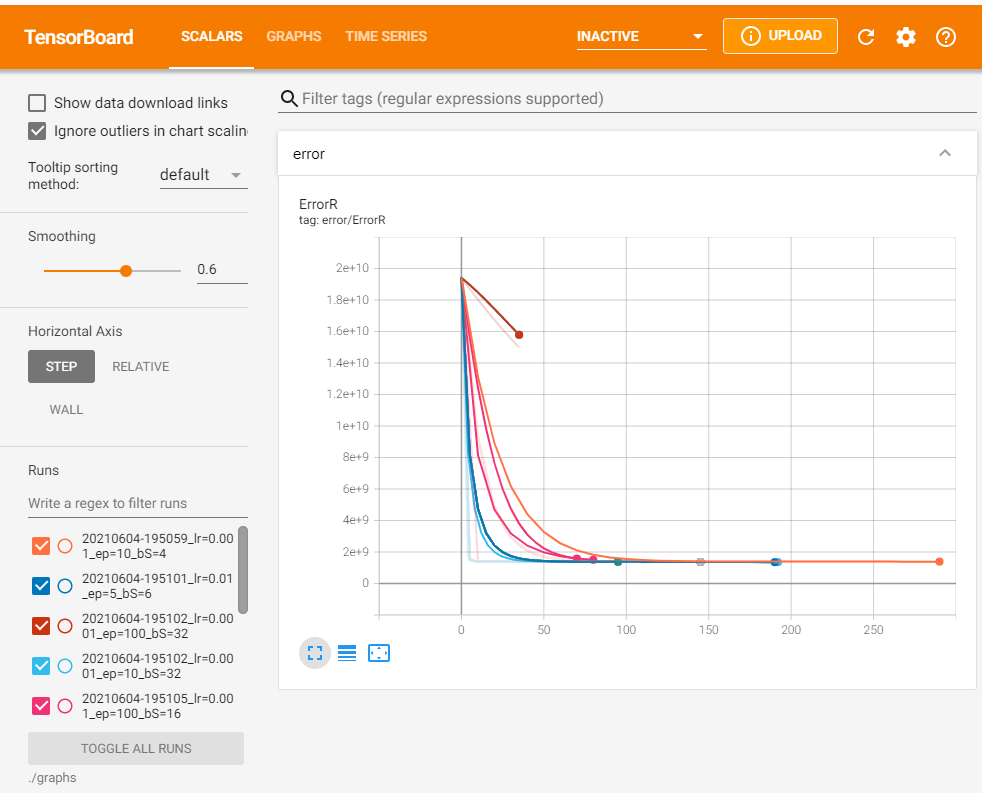

## Grafo generado

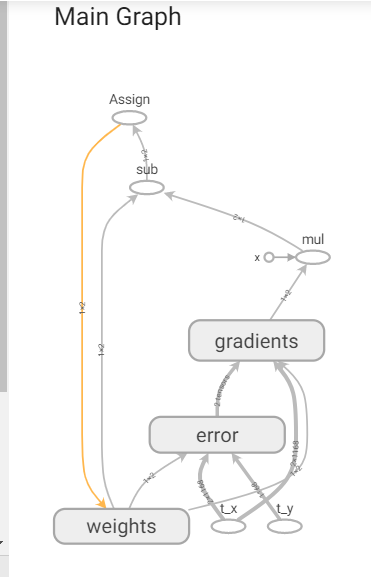

## Conclusión

Utilizando el Mini-Batch para el set de datos entrenados, logramos la soluciónal modelo de una manera rápida sin tener que pasar por todos los datos del training set para lograr los valores minimizando el costo.

Revisando los resultados, podemos concluir que, el valor del learning rate es un factor importante en la minimización del error del modelo entrenado.

Los valores de entrenamiento, lr=0.01 con epoch = 40 y un batchsize de 6 registró una solución bastante rápido para encontrar el menor costo y con menos iteraciones que las demás entrenamientos, esto comprueba nuestra hipótesis.

El peor set de valores de prueba fueron los que se utilizaron un lr mucho menor, como 0.0001 a pesar de tener epoch=100 y un batchsize de 32.